# **Đề tài: Phân tích, thống kê video thịnh hành trên youtube theo các quốc gia**


# 1. Gather data

## 1.1 Problem Statement
## **Trần Phan Minh Tiến**

    Question 1: Vẽ biểu đồ tròn thể hiện tỷ lệ số lượng video thịnh hành tại 10 quốc gia:
    Hoa Kỳ (US), Canada (CA), Đức (DE), Pháp (FR), Anh (GB), Ấn Độ (IN), Nhật Bản (JP), Hàn Quốc (KR), Mexico (MX), Nga (RU).

    Question 2: Vẽ biểu đồ cột so sánh lượt thích, không thích, lượt xem và bình luận trung bình của các video thịnh hành.
## **Trần Minh Thuận**

    Question 3: dang suy nghi

    Question 4: Biểu đồ thể hiện thể loại nội dung trending cho từng quốc gia
## **Hoàng Văn Đức**

    Question 5:  Vẽ biểu đồ cột nhóm thể hiện số lượng video thịnh hành theo quý trong các năm 2015, 2020 và 2024.

    Question 6: Vẽ biểu đồ đường hoặc cột thể hiện lượt xem trung bình theo từng ngày trong tuần của video thịnh hành năm 2024.

## 1.2 Import libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import kagglehub
import datetime
import wordcloud
import json


# TẢI DATA XUỐNG TỪ KAGGLEHUB

In [75]:
# Tai du lieu tu Kaggle
kaggle_download_path = kagglehub.dataset_download("datasnaek/youtube-new")
print("Path to dataset files:", kaggle_download_path)

Path to dataset files: C:\Users\TV\.cache\kagglehub\datasets\datasnaek\youtube-new\versions\115


In [4]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# cau hinh thu vien matplot
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# %matplotlib notebook

### Gán Mã màu, thuộc tính cho đồ thị

In [7]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='DejaVu Sans', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

### Đọc tất cả các file

In [9]:
def read_and_fix_csv(path, fix_columns=None, default_encoding='utf-8', fallback_encoding='ISO-8859-1'):
    """
    Đọc CSV với kiểm tra encoding, và sửa lỗi encoding ở một số cột nếu cần.
    """
    try:
        df = pd.read_csv(path, encoding=default_encoding)
    except UnicodeDecodeError:
        df = pd.read_csv(path, encoding=fallback_encoding)

    if fix_columns:
        for col in fix_columns:
            if col in df.columns:
                df[col] = df[col].apply(fix_encoding)

    return df

def fix_encoding(s):
    try:
        return s.encode('latin1').decode('utf-8')
    except:
        return s  # giữ nguyên nếu không chuyển được


In [15]:
# Danh sách quốc gia và các đường dẫn tương ứng
country_codes = ['US', 'CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU']
columns_to_fix = ['title', 'channel_title', 'description', 'tags']

# Tạo dict lưu các DataFrame
dataframes = {}

for code in country_codes:
    filepath = f"{kaggle_download_path}/{code}videos.csv"
    fix = code in ['JP', 'KR', 'RU']  # JP, KR, RU cần sửa lỗi encoding
    df = read_and_fix_csv(filepath, fix_columns=columns_to_fix if fix else None)
    dataframes[code] = df

### doc 5 du lieu dau/cuoi cua tep 

In [45]:
df.head(5)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


In [47]:
df.tail(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40734,OMmR9THjVKM,18.14.06,У меня СДВГ! (Story booth на русском) Русская ...,Pastime Time,22,2018-06-13T13:47:01.000Z,"story booth на русском|""story booth перевод""|""...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,Котики в Blade and Soul - https://bit.ly/2JoOq...
40735,tX7p7NtNVDE,18.14.06,Мои Детские Травмы 2 (анимация),CaGArt,23,2018-06-12T09:38:38.000Z,"кагарт|""каги""|""цагарт""|""гагарт""|""какарт""|""милш...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,Мои Детские Травмы 2 (анимация) ▶️Ск...
40736,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,24,2018-06-13T12:51:23.000Z,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...
40737,4PiSLIrsSiY,18.14.06,ОБЗОР ВАННОЙ КОМНАТЫ🛁/ТУАЛЕТНОЙ КОМНАТЫ🚽 + ДЕК...,Ксюша Лебедева,22,2018-06-13T00:23:33.000Z,"рум тур ванной комнаты|""room tour bathroom""|""д...",14225,793,39,209,https://i.ytimg.com/vi/4PiSLIrsSiY/default.jpg,False,False,False,"Обзор ванной комнаты, туалетной комнаты+ декор..."
40738,Ehy5foVfKOE,18.14.06,Плохой сигнал. Стань человеком!,Tubus Show,29,2018-06-13T09:50:09.000Z,"плохой сигнал|""тубус шоу""|""reebok""|""стань чело...",52340,7708,133,1819,https://i.ytimg.com/vi/Ehy5foVfKOE/default.jpg,False,False,False,В 90-х годах прошлого века произошло коренное ...


## 1.3 Xem thông tin của Dataset

# VIẾT HÀM HIỂN THỊ THÔNG TIN CƠ BẢN CHO TỪNG DỮ LIỆU CỦA TỪNG QUỐC GIA

In [16]:
def display_basic_info(dataframes, country_names):
    """
    Hiển thị thông tin tổng quan và chi tiết về dữ liệu từng quốc gia.
    """
    print("\n=== 📊 THÔNG TIN CƠ BẢN VỀ DỮ LIỆU ===")

    total_records = 0
    for country, df in dataframes.items():
        print(f"\n{country_names.get(country, 'Unknown')} ({country}):")
        print(f"  - 📄 Số bản ghi: {len(df):,}")
        print(f"  - 🧱 Số cột: {len(df.columns)}")
        print(f"  - 💾 Kích thước bộ nhớ: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

        # Video duy nhất
        unique_videos = df['video_id'].nunique() if 'video_id' in df.columns else 'N/A'
        print(f"  - 🎥 Video duy nhất: {unique_videos:,}")

        # Category phổ biến
        if 'category_id' in df.columns:
            top_categories = df['category_id'].value_counts().head(3).to_dict()
            print(f"  - 🔢 Top 3 category_id: {top_categories}")

        # Mô tả bị thiếu (NaN hoặc rỗng)
        missing_descriptions = df['description'].isna().sum() if 'description' in df.columns else 0
        empty_descriptions = (df['description'] == '').sum() if 'description' in df.columns else 0
        total_missing = missing_descriptions + empty_descriptions
        if 'description' in df.columns:
            missing_rate = total_missing / len(df) * 100
            print(f"  - 📝 Mô tả thiếu (NaN + rỗng): {total_missing:,} ({missing_rate:.2f}%)")

        # Ngày xuất bản sớm nhất & muộn nhất
        if 'publish_time' in df.columns:
            try:
                df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
                min_date = df['publish_time'].min()
                max_date = df['publish_time'].max()
                print(f"  - 📆 Ngày đăng: {min_date.date()} ➝ {max_date.date()}")
            except Exception as e:
                print(f"  - ⚠️ Lỗi chuyển đổi ngày: {e}")

        # Cột có dữ liệu thiếu
        null_columns = df.columns[df.isnull().any()]
        if len(null_columns):
            print(f"  - ⚠️ Các cột có missing values: {', '.join(null_columns)}")

        total_records += len(df)

    print(f"\n📈 TỔNG KẾT:")
    print(f"  - Tổng số bản ghi: {total_records:,}")
    print(f"  - Số quốc gia: {len(dataframes)}")


# GÁN NHÃN TÊN CHO CÁC MÃ QUỐC GIA

In [17]:
country_names = {
    'US': 'United States',
    'CA': 'Canada',
    'DE': 'Germany',
    'FR': 'France',
    'GB': 'United Kingdom',
    'IN': 'India',
    'JP': 'Japan',
    'KR': 'South Korea',
    'MX': 'Mexico',
    'RU': 'Russia'
}


# GỌI HÀM HIỂN THỊ THÔNG TIN DỮ LIỆU

In [65]:
display_basic_info(dataframes, country_names)


=== 📊 THÔNG TIN CƠ BẢN VỀ DỮ LIỆU ===

United States (US):
  - 📄 Số bản ghi: 40,949
  - 🧱 Số cột: 16
  - 💾 Kích thước bộ nhớ: 109.6 MB
  - 🎥 Video duy nhất: 6,351
  - 🔢 Top 3 category_id: {24: 9964, 10: 6472, 26: 4146}
  - 📝 Mô tả thiếu (NaN + rỗng): 570 (1.39%)
  - 📆 Ngày đăng: 2006-07-23 ➝ 2018-06-14
  - ⚠️ Các cột có missing values: description

Canada (CA):
  - 📄 Số bản ghi: 40,881
  - 🧱 Số cột: 16
  - 💾 Kích thước bộ nhớ: 109.8 MB
  - 🎥 Video duy nhất: 24,427
  - 🔢 Top 3 category_id: {24: 13451, 25: 4159, 22: 4105}
  - 📝 Mô tả thiếu (NaN + rỗng): 1,296 (3.17%)
  - 📆 Ngày đăng: 2008-01-13 ➝ 2018-06-14
  - ⚠️ Các cột có missing values: description

Germany (DE):
  - 📄 Số bản ghi: 40,840
  - 🧱 Số cột: 16
  - 💾 Kích thước bộ nhớ: 114.2 MB
  - 🎥 Video duy nhất: 29,627
  - 🔢 Top 3 category_id: {24: 15292, 22: 5988, 25: 2935}
  - 📝 Mô tả thiếu (NaN + rỗng): 1,552 (3.80%)
  - 📆 Ngày đăng: 2012-04-18 ➝ 2018-06-14
  - ⚠️ Các cột có missing values: description

France (FR):
  - 📄 Số bản ghi

# 2. Truy cập vào dữ liệu:

---



In [62]:
def thong_ke_du_lieu(df, country_names):
    print("\n[KHÁM PHÁ DỮ LIỆU]")
    print("=" * 40)

    for code, table in df.items():
        print(f"\nQuốc gia: {country_names[code]} - Mã: {code}")
        print("-" * 40)

        print(f"Tổng số dòng: {len(table)}, số cột: {len(table.columns)}")
        print(f"Kích thước bộ nhớ: {table.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

        print("\nCột và kiểu dữ liệu:")
        for column in table.columns:
            nulls = table[column].isna().sum()
            print(f"{column}: {table[column].dtype}, null: {nulls}")

        print("\nMột số dòng đầu tiên:")
        if all(c in table.columns for c in ['title', 'channel_title', 'views']):
            print(table[['title', 'channel_title', 'views']].head())
        else:
            print("Không thể hiển thị vì thiếu cột.")

        print("\nThống kê số liệu:")
        number_col = ['views', 'likes', 'dislikes', 'comment_count']
        number_col = [c for c in number_col if c in table.columns]
        if number_col:
            print(table[number_col].describe().round(1))
        else:
            print("Không có cột số để thống kê.")

        print("\nKiểm tra missing values:")
        missing = table.isna().sum()
        for column, sl in missing.items():
            if sl > 0:
                print(f"{column}: {sl} ({sl/len(table)*100:.1f}%)")

        print("-" * 40)


In [63]:
thong_ke_du_lieu(dataframes, country_names)


[KHÁM PHÁ DỮ LIỆU]

Quốc gia: United States - Mã: US
----------------------------------------
Tổng số dòng: 40899, số cột: 25
Kích thước bộ nhớ: 111.86 MB

Cột và kiểu dữ liệu:
video_id: object, null: 0
trending_date: datetime64[ns], null: 25524
title: object, null: 0
channel_title: object, null: 0
category_id: int64, null: 0
publish_time: datetime64[ns, UTC], null: 0
tags: object, null: 0
views: int64, null: 0
likes: int64, null: 0
dislikes: int64, null: 0
comment_count: int64, null: 0
thumbnail_link: object, null: 0
comments_disabled: bool, null: 0
ratings_disabled: bool, null: 0
video_error_or_removed: bool, null: 0
description: object, null: 0
like_rate: float64, null: 0
dislike_rate: float64, null: 0
comment_rate: float64, null: 0
engagement_rate: float64, null: 0
tag_count: int64, null: 0
description_length: int64, null: 0
title_length: int64, null: 0
country: object, null: 0
country_name: object, null: 0

Một số dòng đầu tiên:
                                               titl

## 2.1 Thêm cột

# Thêm các cột phân tích hiệu suất vào DataFrame.

Thêm các cột:
        - engagement_rate (%)
        - like_dislike_ratio
        - viral_score
        - performance_category

In [73]:
def add_performance_metrics(df):
    """
    
    """
    if df is None or df.empty:
        print("⚠️ DataFrame rỗng hoặc không hợp lệ.")
        return df

    print("🚀 Thêm cột phân tích hiệu suất...")

    df = df.copy()

    # Engagement Rate (%)
    df['engagement_rate'] = ((df['likes'] + df['comment_count']) / df['views'].replace(0, np.nan) * 100).round(2)
    df['engagement_rate'] = df['engagement_rate'].fillna(0).clip(lower=0)

    # Like/Dislike Ratio
    df['like_dislike_ratio'] = np.where(
        df['dislikes'] > 0,
        (df['likes'] / df['dislikes']).round(2),
        np.where(df['likes'] > 0, np.inf, 0)
    )

    # Viral Score
    max_views = df['views'].max() or 1
    max_engagement = df['engagement_rate'].max() or 1

    df['viral_score'] = (
        (df['views'] / max_views * 0.7 +
         df['engagement_rate'] / max_engagement * 0.3) * 100
    ).round(2)

    # Performance Category
    df['performance_category'] = pd.cut(
        df['viral_score'],
        bins=[0, 20, 40, 60, 80, 100],
        labels=['Low', 'Below Average', 'Average', 'Good', 'Excellent'],
        include_lowest=True
    )

    print("✅ Đã thêm: engagement_rate, like_dislike_ratio, viral_score, performance_category")
    return df

# Thêm các cột phân tích thời gian vào DataFrame.

In [75]:
def add_time_analysis(df):
    print("Thêm cột phân tích thời gian...")

    df = df.copy()
    df['trending_datetime'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

    df['trending_weekday'] = df['trending_datetime'].dt.day_name()
    df['trending_month'] = df['trending_datetime'].dt.month_name()
    df['is_weekend_trending'] = df['trending_datetime'].dt.weekday >= 5
    df['trending_week'] = df['trending_datetime'].dt.isocalendar().week

    if 'publish_time' in df.columns:
        df['publish_datetime'] = pd.to_datetime(df['publish_time'], errors='coerce')
        df['upload_to_trending_days'] = (df['trending_datetime'] - df['publish_datetime']).dt.days

    print("✅ Đã thêm: trending_weekday, trending_month, is_weekend_trending, trending_week, upload_to_trending_days")
    return df

# Dự đoán loại nội dung dựa trên tiêu đề

In [77]:
def predict_content_type(title):
    title_lower = str(title).lower()

    music_keywords = ['official', 'mv', 'music video', 'song', 'audio', 'feat', 'ft']
    tutorial_keywords = ['how to', 'tutorial', 'guide', 'tips', 'diy', 'review']
    news_keywords = ['news', 'breaking', 'report', 'update', 'interview']
    entertainment_keywords = ['funny', 'comedy', 'reaction', 'prank', 'challenge']
    gaming_keywords = ['gameplay', 'gaming', 'let\'s play', 'walkthrough']

    if any(keyword in title_lower for keyword in music_keywords):
        return 'Music'
    elif any(keyword in title_lower for keyword in tutorial_keywords):
        return 'Tutorial'
    elif any(keyword in title_lower for keyword in news_keywords):
        return 'News'
    elif any(keyword in title_lower for keyword in entertainment_keywords):
        return 'Entertainment'
    elif any(keyword in title_lower for keyword in gaming_keywords):
        return 'Gaming'
    else:
        return 'Other'


# 3. Clean data:

# LOẠI BỎ BẢN GHI TRÙNG LẶP

In [23]:
def remove_duplicates(df):
        """
        Loại bỏ duplicates
        """
        initial_count = len(df)

        # Loại bỏ duplicate dựa trên video_id và trending_date
        df = df.drop_duplicates(subset=['video_id', 'trending_date'], keep='first')

        removed_count = initial_count - len(df)
        if removed_count > 0:
            print(f"  ✓ Đã loại bỏ {removed_count:,} bản ghi trùng lặp")

        return df

# XỬ LÝ MISSING VALUES

In [25]:
def handle_missing_values(df):
        """
        Xử lý missing values
        """
        # Fill missing boolean values
        bool_cols = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
        for col in bool_cols:
            df[col] = df[col].fillna(False)

        # Fill missing category_id với mode
        if df['category_id'].isna().sum() > 0:
            mode_category = df['category_id'].mode().iloc[0] if not df['category_id'].mode().empty else 0
            df['category_id'] = df['category_id'].fillna(mode_category)

        return df

# LÀM SẠCH CÁC CỘT CÓ DẠNG DỮ LIỆU TEXT

In [27]:
def clean_text_columns(df):
        # Làm sạch title
        df['title'] = df['title'].fillna('').astype(str)
        df['title'] = df['title'].str.strip()

        # Làm sạch channel_title
        df['channel_title'] = df['channel_title'].fillna('').astype(str)
        df['channel_title'] = df['channel_title'].str.strip()

        # Làm sạch tags
        df['tags'] = df['tags'].fillna('').astype(str)
        df['tags'] = df['tags'].str.replace('[none]', '', regex=False)

        # Đếm số lượng tags
        df['tag_count'] = df['tags'].apply(lambda x: len([tag.strip() for tag in x.split('|') if tag.strip()]) if x else 0)

        # Làm sạch description
        df['description'] = df['description'].fillna('').astype(str)
        df['description_length'] = df['description'].str.len()

        # Tạo title length
        df['title_length'] = df['title'].str.len()

        return df


# LÀM SẠCH CÁC CỘT CÓ DẠNG DỮ LIỆU SỐ

In [29]:
def clean_numeric_columns(df):
        numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']

        for col in numeric_cols:
            # Chuyển đổi về số và xử lý giá trị âm
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df[col] = df[col].fillna(0).astype(int)
            df[col] = df[col].abs()  # Loại bỏ giá trị âm

        # Tạo các metric tỷ lệ
        df['like_rate'] = df['likes'] / (df['views'] + 1)  # +1 để tránh chia cho 0
        df['dislike_rate'] = df['dislikes'] / (df['views'] + 1)
        df['comment_rate'] = df['comment_count'] / (df['views'] + 1)
        df['engagement_rate'] = (df['likes'] + df['dislikes'] + df['comment_count']) / (df['views'] + 1)

        return df

# LÀM SẠCH CÁC CỘT CHỨA DẠNG DỮ LIỆU DATETIME

In [31]:
def clean_datetime_columns(df):
    if 'publish_time' in df.columns:
        df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
    return df

# HÀM LÀM SẠCH CHÍNH

In [33]:
def clean_data(dataframes, country_names):
    """
    Làm sạch dữ liệu cho tất cả các quốc gia (không dùng class).
    """
    print("\n=== BẮT ĐẦU LÀM SẠCH DỮ LIỆU ===")

    for country, df in dataframes.items():
        print(f"\nĐang xử lý {country_names.get(country, 'Unknown')} ({country})...")
        original_rows = len(df)

        try:
            # 1. Xử lý thời gian
            df = clean_datetime_columns(df)
            print("  ✓ Đã xử lý thời gian")

            # 2. Chuẩn hoá số liệu
            df = clean_numeric_columns(df)
            print("  ✓ Đã chuẩn hoá số liệu")

            # 3. Làm sạch text
            df = clean_text_columns(df)
            print("  ✓ Đã làm sạch text")

            # 4. Xử lý missing values
            df = handle_missing_values(df)
            print("  ✓ Đã xử lý missing values")

            # 5. Xoá trùng lặp
            df = remove_duplicates(df)
            print("  ✓ Đã loại bỏ bản ghi trùng lặp")

            # 6. Thêm thông tin quốc gia
            df['country'] = country
            df['country_name'] = country_names[country]

            cleaned_rows = len(df)
            removed = original_rows - cleaned_rows
            print(f"  → Tổng bản ghi sau làm sạch: {cleaned_rows:,} (giảm {removed:,})")

            # Cập nhật lại
            dataframes[country] = df

        except Exception as e:
            print(f"Lỗi khi xử lý {country}: {e}")

    print("\nHoàn tất làm sạch dữ liệu cho tất cả quốc gia.")
    return dataframes


In [34]:
dataframes = clean_data(dataframes, country_names)


=== 🧹 BẮT ĐẦU LÀM SẠCH DỮ LIỆU ===

🔧 Đang xử lý United States (US)...
  ✓ Đã xử lý thời gian
  ✓ Đã chuẩn hoá số liệu
  ✓ Đã làm sạch text
  ✓ Đã xử lý missing values
  ✓ Đã loại bỏ 50 bản ghi trùng lặp
  ✓ Đã loại bỏ bản ghi trùng lặp
  → Tổng bản ghi sau làm sạch: 40,899 (giảm 50)

🔧 Đang xử lý Canada (CA)...
  ✓ Đã xử lý thời gian
  ✓ Đã chuẩn hoá số liệu
  ✓ Đã làm sạch text
  ✓ Đã xử lý missing values
  ✓ Đã loại bỏ bản ghi trùng lặp
  → Tổng bản ghi sau làm sạch: 40,881 (giảm 0)

🔧 Đang xử lý Germany (DE)...
  ✓ Đã xử lý thời gian
  ✓ Đã chuẩn hoá số liệu
  ✓ Đã làm sạch text
  ✓ Đã xử lý missing values
  ✓ Đã loại bỏ bản ghi trùng lặp
  → Tổng bản ghi sau làm sạch: 40,840 (giảm 0)

🔧 Đang xử lý France (FR)...
  ✓ Đã xử lý thời gian
  ✓ Đã chuẩn hoá số liệu
  ✓ Đã làm sạch text
  ✓ Đã xử lý missing values
  ✓ Đã loại bỏ bản ghi trùng lặp
  → Tổng bản ghi sau làm sạch: 40,724 (giảm 0)

🔧 Đang xử lý United Kingdom (GB)...
  ✓ Đã xử lý thời gian
  ✓ Đã chuẩn hoá số liệu
  ✓ Đã làm

#TẠO DATASET TỔNG HỢP (MERGE)

In [41]:
def create_combined_dataset(dataframes):
    """
    Tạo dataset tổng hợp từ tất cả các quốc gia.
    """
    print("\n=== 🔄 TẠO DATASET TỔNG HỢP ===")

    if not dataframes:
        print("✗ Không có dữ liệu để kết hợp")
        return None

    # Kết hợp tất cả DataFrame
    combined_df = pd.concat(dataframes.values(), ignore_index=True)

    print(f"✓ Đã tạo dataset tổng hợp với:")
    print(f"  - Tổng số bản ghi: {len(combined_df):,}")
    print(f"  - Số cột: {len(combined_df.columns)}")
    print(f"  - Số quốc gia: {len(dataframes)}")
    print(f"  - Kích thước bộ nhớ: {combined_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    return combined_df


In [43]:
combined_df = create_combined_dataset(dataframes)


=== 🔄 TẠO DATASET TỔNG HỢP ===
✓ Đã tạo dataset tổng hợp với:
  - Tổng số bản ghi: 375,942
  - Số cột: 16
  - Số quốc gia: 10
  - Kích thước bộ nhớ: 879.66 MB


#**4.Save new after clean**

##4.1. REPORT CHẤT LƯỢNG CỦA DỮ LIỆU

Hàm này tạo báo cáo đơn giản về chất lượng dữ liệu cho mỗi quốc gia.
    Báo cáo bao gồm:
    - Giá trị bị thiếu
    - Dữ liệu âm
    - Ngày không hợp lệ
    - Tiêu đề và mô tả bị trống

In [50]:
import pandas as pd
from datetime import datetime

def generate_data_quality_report(dataframes, ten_quoc_gia):

    print("\n====== BÁO CÁO CHẤT LƯỢNG DỮ LIỆU ======\n")

    for ma_qg, df in dataframes.items():
        print(f"Quốc gia: {ten_quoc_gia[ma_qg]} ({ma_qg})")

        # 1. Kiểm tra dữ liệu bị thiếu
        so_luong_thieu = df.isnull().sum()
        tong_thieu = so_luong_thieu.sum()

        if tong_thieu == 0:
            print("- Không có dữ liệu bị thiếu.")
        else:
            print("- Cột có dữ liệu bị thiếu:")
            for cot, so in so_luong_thieu.items():
                if so > 0:
                    ti_le = so / len(df) * 100
                    print(f"  + {cot}: {so} dòng ({ti_le:.1f}%)")

        # 2. Kiểm tra giá trị âm
        cot_kiem_tra = ['views', 'likes', 'dislikes', 'comment_count']
        co_am = False
        for cot in cot_kiem_tra:
            if cot in df.columns:
                so_am = (df[cot] < 0).sum()
                if so_am > 0:
                    co_am = True
                    print(f"- Cột '{cot}' có {so_am} giá trị âm.")
        if not co_am:
            print("- Không có giá trị âm trong các cột chính.")

        # 3. Kiểm tra ngày trending có nằm trong tương lai không
        if 'trending_date' in df.columns:
            try:
                df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
                so_ngay_sai = (df['trending_date'] > datetime.now()).sum()
                if so_ngay_sai > 0:
                    print(f"- Có {so_ngay_sai} dòng có ngày trending nằm trong tương lai.")
                else:
                    print("- Không có ngày trending nào sai.")
            except Exception as e:
                print("- Không thể kiểm tra trending_date.")

        # 4. Kiểm tra tiêu đề bị trống
        if 'title' in df.columns:
            so_tieu_de_trong = df['title'].isnull().sum()
            so_tieu_de_trang = (df['title'].astype(str).str.strip() == '').sum()
            tong_trong = so_tieu_de_trong + so_tieu_de_trang
            if tong_trong > 0:
                print(f"- Có {tong_trong} video không có tiêu đề.")
            else:
                print("- Tất cả video đều có tiêu đề.")

        # 5. Kiểm tra mô tả bị trống
        if 'description' in df.columns:
            so_mo_ta_trong = df['description'].isnull().sum()
            so_mo_ta_trang = (df['description'].astype(str).str.strip() == '').sum()
            tong_mo_ta_trong = so_mo_ta_trong + so_mo_ta_trang
            if tong_mo_ta_trong > 0:
                print(f"- Có {tong_mo_ta_trong} video không có mô tả.")
            else:
                print("- Tất cả video đều có mô tả.")

        print("-" * 40)  # Dòng ngăn cách giữa các quốc gia


In [51]:
generate_data_quality_report(dataframes, country_names)


====== BÁO CÁO CHẤT LƯỢNG DỮ LIỆU ======

Quốc gia: United States (US)
- Không có dữ liệu bị thiếu.
- Không có giá trị âm trong các cột chính.
- Không có ngày trending nào sai.
- Tất cả video đều có tiêu đề.
- Có 577 video không có mô tả.
----------------------------------------
Quốc gia: Canada (CA)
- Không có dữ liệu bị thiếu.
- Không có giá trị âm trong các cột chính.
- Không có ngày trending nào sai.
- Tất cả video đều có tiêu đề.
- Có 1296 video không có mô tả.
----------------------------------------
Quốc gia: Germany (DE)
- Không có dữ liệu bị thiếu.
- Không có giá trị âm trong các cột chính.
- Không có ngày trending nào sai.
- Tất cả video đều có tiêu đề.
- Có 1552 video không có mô tả.
----------------------------------------
Quốc gia: France (FR)
- Không có dữ liệu bị thiếu.
- Không có giá trị âm trong các cột chính.
- Không có ngày trending nào sai.
- Tất cả video đều có tiêu đề.
- Có 2913 video không có mô tả.
----------------------------------------
Quốc gia: United Kingd

In [45]:
# Hiển thị 10 mẫu dữ liệu từ dataset tổng hợp
combined_df.sample(10, random_state=42)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
351141,0xENH2kdqJY,18.03.02,Россия унижает МОК в Швейцарии (Руслан Осташко),PolitRussia,15,2018-02-02T15:01:27.000Z,"МОК|""олимпиада""|""Россия""|""олимпийский комитет""...",34653,3697,40,463,https://i.ytimg.com/vi/0xENH2kdqJY/default.jpg,False,False,False,Журналисты и пользователи соцсетей соревнуются...
172566,66kn6Dcr12E,17.29.12,Taylor Swift's reputation Stadium Tour - Trailer,Taylor Swift,10,2017-12-13T15:00:00.000Z,"taylor swift|""reputation""|""rep""|""taylor swift'...",273959,25357,477,2164,https://i.ytimg.com/vi/66kn6Dcr12E/default.jpg,False,False,False,Tickets to Taylor Swift's reputation Stadium T...
197044,spOc_9ZhshU,18.14.05,Will Ferrell & LAFC Use James as Target Practice,The Late Late Show with James Corden,24,2018-05-03T05:28:30.000Z,"The Late Late Show|""Late Late Show""|""James Cor...",328941,3754,104,221,https://i.ytimg.com/vi/spOc_9ZhshU/default.jpg,False,False,False,LAFC co-owner Will Ferrell invites some of the...
286861,fHu24itapqc,18.30.04,태극기 집회에서 통일과 정상회담에 대해 물었다.,Huffpost Korea,22,2018-04-26T05:20:53.000Z,"태극기집회|""통일""|""남북정상회담""|""정상회담""|""북미정상회담""|""트럼프""|""문재인...",37915,318,82,685,https://i.ytimg.com/vi/fHu24itapqc/default.jpg,False,False,False,태극기 집회에서 만난 시민들에게 통일과 정상회담은 곤혹스러운 주제였다.\n\n”연방...
53793,5xTCk3x28aw,18.19.01,Things Got Very Awkward at The Oversight Heari...,Comedy Central UK,23,2018-01-18T12:42:52.000Z,"comedy central|""comedy central uk""|""the daily ...",97362,1512,38,97,https://i.ytimg.com/vi/5xTCk3x28aw/default.jpg,False,False,False,Senator Cory Booker voices his frustration to ...
218291,2HYd3nugLTw,18.09.02,THE LAST MISTAKE - | Elvish Yadav |,Elvish yadav,23,2018-02-05T15:14:09.000Z,"elvish yadav new video|""elvish yadav latest vi...",1852491,186786,3534,8472,https://i.ytimg.com/vi/2HYd3nugLTw/default.jpg,False,False,False,The video is story of two friends and how jeal...
49681,ViG5fqCt93A,17.27.12,Crime Patrol Dial 100 - Ep 675 - Full Episode ...,SET India,24,2017-12-24T16:11:25.000Z,"true events|""sony entertainment channel""|""cons...",299977,1498,233,215,https://i.ytimg.com/vi/ViG5fqCt93A/default.jpg,False,False,False,Click here to subscribe to SonyLIV : http://w...
111599,otoX-ItI_U0,18.20.04,12 krasse FOTOS bei denen dir DIE LUFT weg ble...,Made My Day,24,2018-04-19T16:00:07.000Z,"Tipps|""Tricks""|""diy""|""Mode""|""Gesund""|""Essen""|""...",59249,3385,256,214,https://i.ytimg.com/vi/otoX-ItI_U0/default.jpg,False,False,False,Made My Day abonnieren: http://mmd.to/Abo\n\n\...
172708,0VsgQmCPgoI,17.30.12,SURPRISE TRIP TO FINLAND!!,Estée Lalonde,22,2017-12-17T17:30:01.000Z,"essiebutton|""Estée Lalonde""|""Estee Lalonde""|""E...",95676,4283,76,443,https://i.ytimg.com/vi/0VsgQmCPgoI/default.jpg,False,False,False,Check out my Christmas Gift Guide for some las...
254541,XlXtSZNFkaY,18.10.05,【試合ダイジェスト動画】 5月9日（水）vs 埼玉西武,SBHawksOfficial,17,2018-05-09T12:21:18.000Z,[none],18899,167,3,56,https://i.ytimg.com/vi/XlXtSZNFkaY/default.jpg,False,False,False,NaN


# **5.Answer the research question (Visuazation)**

##**Trần Phan Minh Tiến**
### **Question 1**: Vẽ biểu đồ tròn thể hiện tỷ lệ số lượng video thịnh hành tại 10 quốc gia: Hoa Kỳ (US), Canada (CA), Đức (DE), Pháp (FR), Anh (GB), Ấn Độ (IN), Nhật Bản (JP), Hàn Quốc (KR), Mexico (MX), Nga (RU).


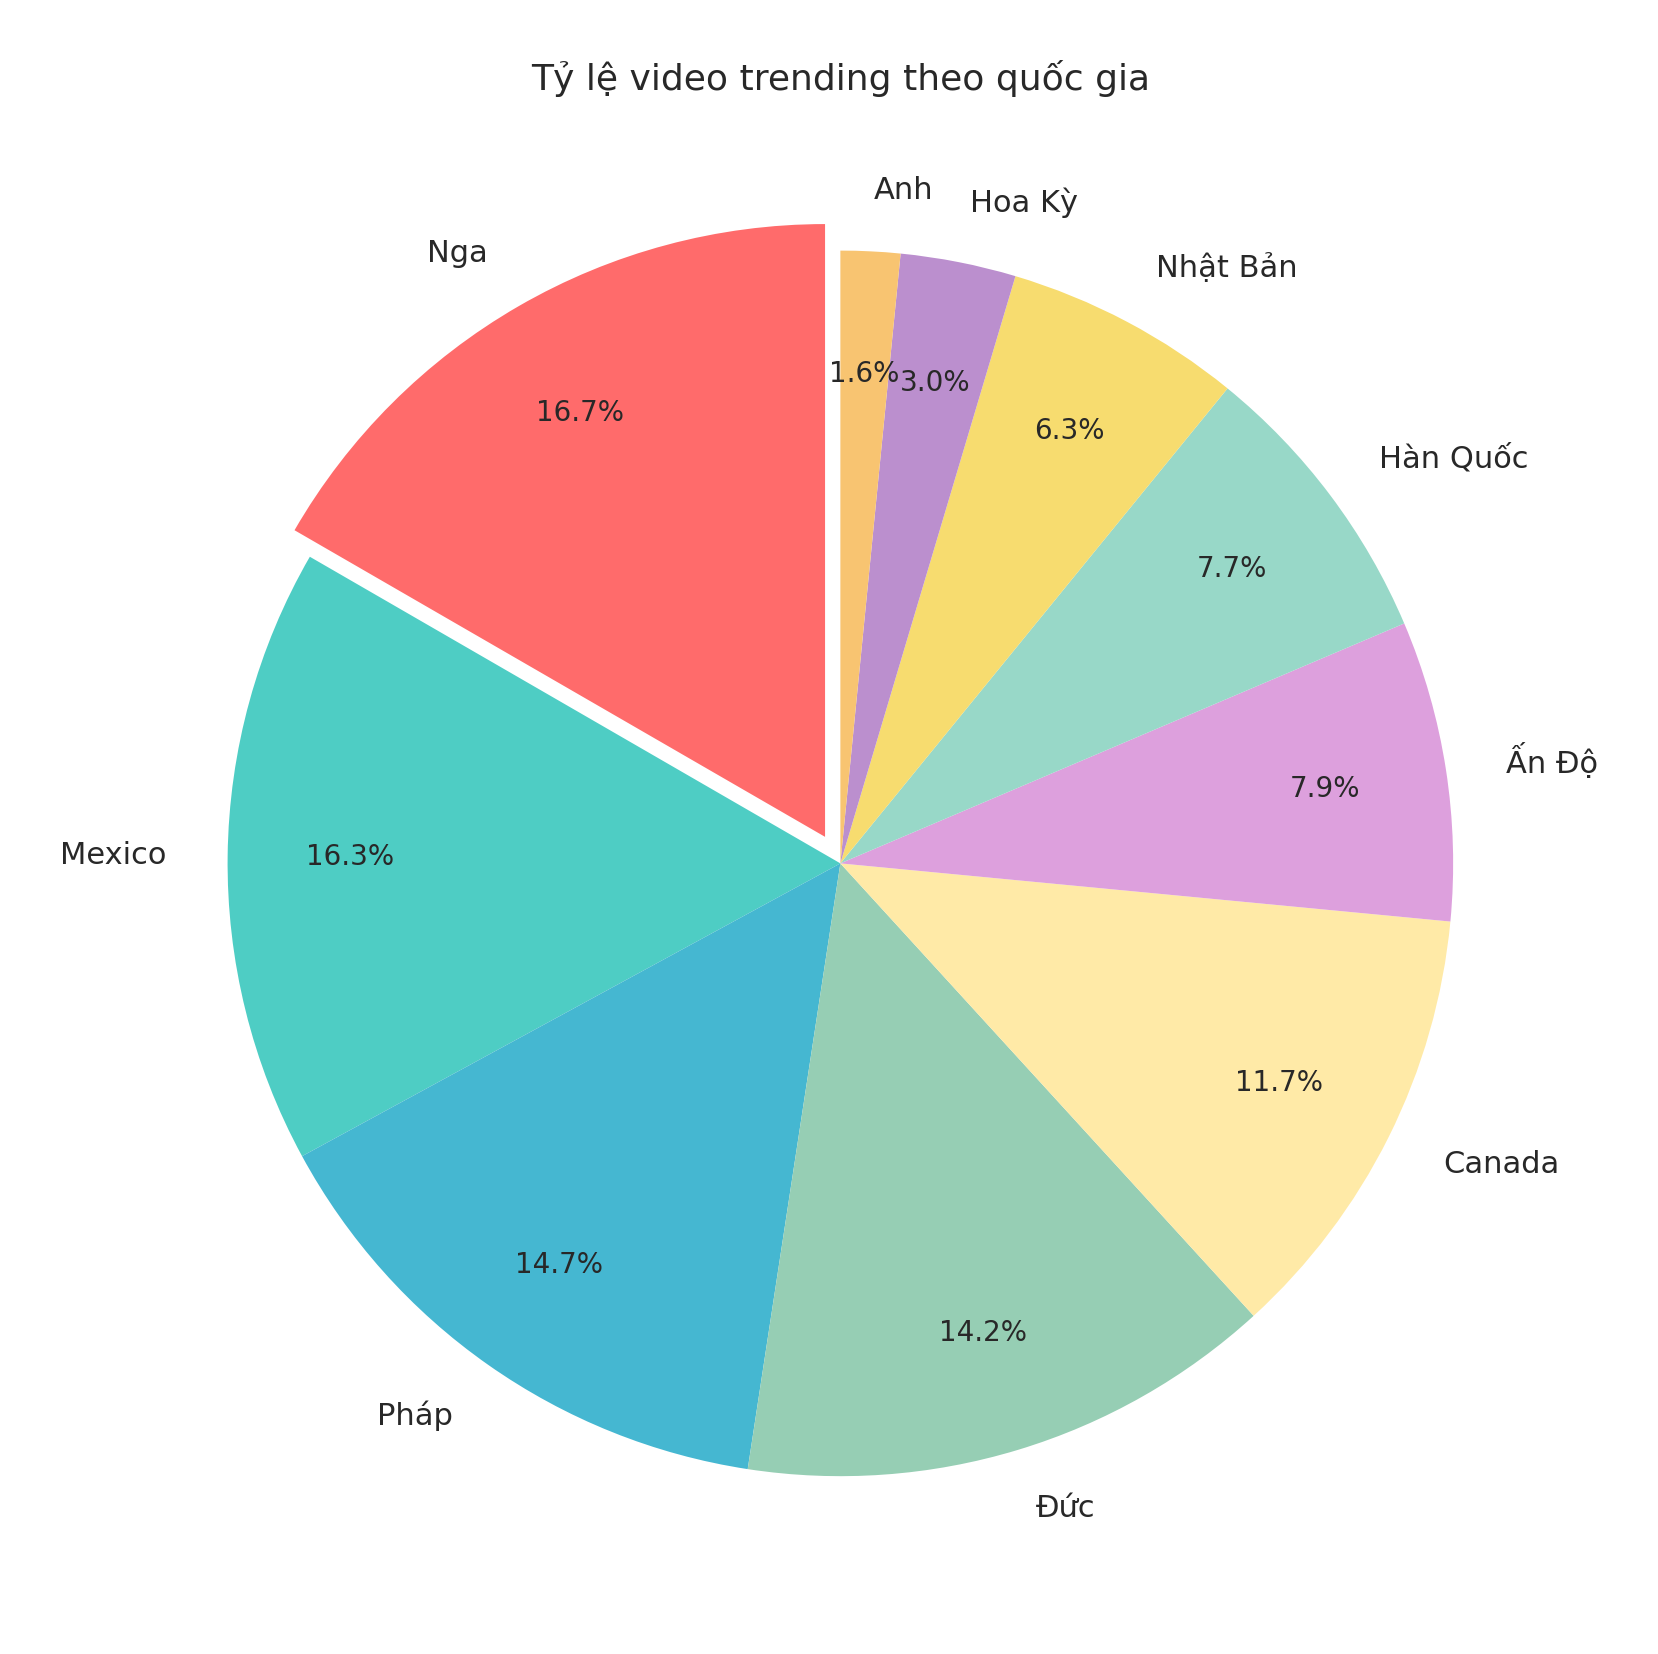

Tổng: 208,718 video

Nga: 34,771 video (16.7%)
Mexico: 33,957 video (16.3%)
Pháp: 30,588 video (14.7%)
Đức: 29,632 video (14.2%)
Canada: 24,433 video (11.7%)
Ấn Độ: 16,523 video (7.9%)
Hàn Quốc: 16,095 video (7.7%)
Nhật Bản: 13,093 video (6.3%)
Hoa Kỳ: 6,354 video (3.0%)
Anh: 3,272 video (1.6%)


In [121]:
import pandas as pd
import matplotlib.pyplot as plt

codes = ['US', 'CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU']
names = {
    'US': 'Hoa Kỳ', 'CA': 'Canada', 'DE': 'Đức', 'FR': 'Pháp',
    'GB': 'Anh', 'IN': 'Ấn Độ', 'JP': 'Nhật Bản',
    'KR': 'Hàn Quốc', 'MX': 'Mexico', 'RU': 'Nga'
}

# Lấy số lượng video mỗi nước
counts = {}
for c in codes:
    if c in dataframes:
        counts[c] = len(dataframes[c])

# Tổng tất cả video
s = sum(counts.values())

# Dữ liệu để vẽ
data = []
for c in sorted(counts, key=counts.get, reverse=True):
    data.append({
        'code': c,
        'name': names[c],
        'count': counts[c],
        'pct': counts[c] / s * 100
    })

# Đưa vào DataFrame
df = pd.DataFrame(data)

# Gán mã màu
cols = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7',
        '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#F8C471']

# Vẽ pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['count'], 
        labels=df['name'],
        colors=cols[:len(df)],
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.8,
        explode=[0.05] + [0]* (len(df) - 1))
plt.title('Tỷ lệ video trending theo quốc gia', fontsize=13)
plt.axis('equal')
plt.tight_layout()
plt.show()

# In kết quả
print(f"Tổng: {s:,} video\n")
for row in df.itertuples():
    print(f"{row.name}: {row.count:,} video ({row.pct:.1f}%)")


## Nhận xét từ biểu đồ phân bố video trending theo quốc gia

### 1. Tổng thể xu hướng
Biểu đồ cho thấy các quốc gia có số lượng video trending nổi bật nhất là **Nga**, **Mexico**, **Pháp** và **Đức**. Đây là các thị trường có mức độ tiêu thụ và sản xuất nội dung số mạnh mẽ, phản ánh hoạt động sôi nổi của người dùng trên các nền tảng như *YouTube*.

---

### 2. Sự khác biệt rõ rệt theo quốc gia

- **Nga (RU)** dẫn đầu với tỷ lệ **16.7%**, cho thấy mức độ video trending rất cao, có thể đến từ việc nền tảng này được ưa chuộng và người dùng tạo nội dung tích cực.
- **Mexico (MX)** theo sát với **16.3%**, cho thấy vai trò quan trọng của khu vực Mỹ Latinh trong xu hướng nội dung số.
- Ngược lại, **Anh (GB)** và **Hoa Kỳ (US)** lại có tỷ lệ thấp đáng kể (**1.6%** và **3.0%** tương ứng), điều này có thể đến từ các yếu tố:
- Thuật toán lọc nội dung trending riêng
- Hoặc sự phân bổ tập trung ở các thị trường khác

---

### 3. Phân bố theo vùng địa lý

- **Châu Âu**: Nga, Pháp, Đức đều chiếm tỷ lệ cao → phản ánh hoạt động nổi bật trong việc tạo và tiêu thụ nội dung.
- **Châu Á**: Hàn Quốc, Ấn Độ, Nhật Bản góp mặt nhưng ở mức trung bình thấp (**~6% – 8%**).
- **Bắc Mỹ**:
- **Canada** chiếm **11.7%**
- **Hoa Kỳ** chỉ đạt **3.0%** → Cho thấy sự dịch chuyển hoạt động trending sang các quốc gia nói tiếng Tây Ban Nha như Mexico.

---

### 4. Nhóm quốc gia theo mức độ video trending


- **Nhóm cao**: Nga, Mexico, Pháp, Đức (trên **14%**)
- **Nhóm trung bình**: Canada, Ấn Độ, Hàn Quốc (**7%–12%**)
- **Nhóm thấp**: Nhật Bản, Hoa Kỳ, Anh (dưới **6%**)

---

Biểu đồ cho thấy sự phân hóa rõ rệt giữa các quốc gia trong xu hướng nội dung trending.


##**Trần Phan Minh Tiến**
### **Question 2**: Vẽ biểu đồ cột so sánh lượt thích, không thích, lượt xem và bình luận trung bình của các video thịnh hành.


>>> US <<<
Tổng video: 40,899
Lượt xem TB: 2,360,649
Lượt thích TB: 74,270
Không thích TB: 3,712
Bình luận TB: 8,449

>>> CA <<<
Tổng video: 40,881
Lượt xem TB: 1,147,036
Lượt thích TB: 39,583
Không thích TB: 2,009
Bình luận TB: 5,043

>>> DE <<<
Tổng video: 40,840
Lượt xem TB: 603,455
Lượt thích TB: 21,876
Không thích TB: 1,397
Bình luận TB: 2,786

>>> FR <<<
Tổng video: 40,724
Lượt xem TB: 419,922
Lượt thích TB: 17,389
Không thích TB: 815
Bình luận TB: 1,832

>>> GB <<<
Tổng video: 38,742
Lượt xem TB: 5,911,516
Lượt thích TB: 134,467
Không thích TB: 7,606
Bình luận TB: 13,081

>>> IN <<<
Tổng video: 32,458
Lượt xem TB: 961,140
Lượt thích TB: 24,267
Không thích TB: 1,529
Bình luận TB: 2,416

>>> JP <<<
Tổng video: 14,543
Lượt xem TB: 238,499
Lượt thích TB: 7,119
Không thích TB: 318
Bình luận TB: 1,024

>>> KR <<<
Tổng video: 31,942
Lượt xem TB: 419,652
Lượt thích TB: 11,823
Không thích TB: 542
Bình luận TB: 1,945

>>> MX <<<
Tổng video: 40,073
Lượt xem TB: 341,607
Lượt thích TB: 15,7

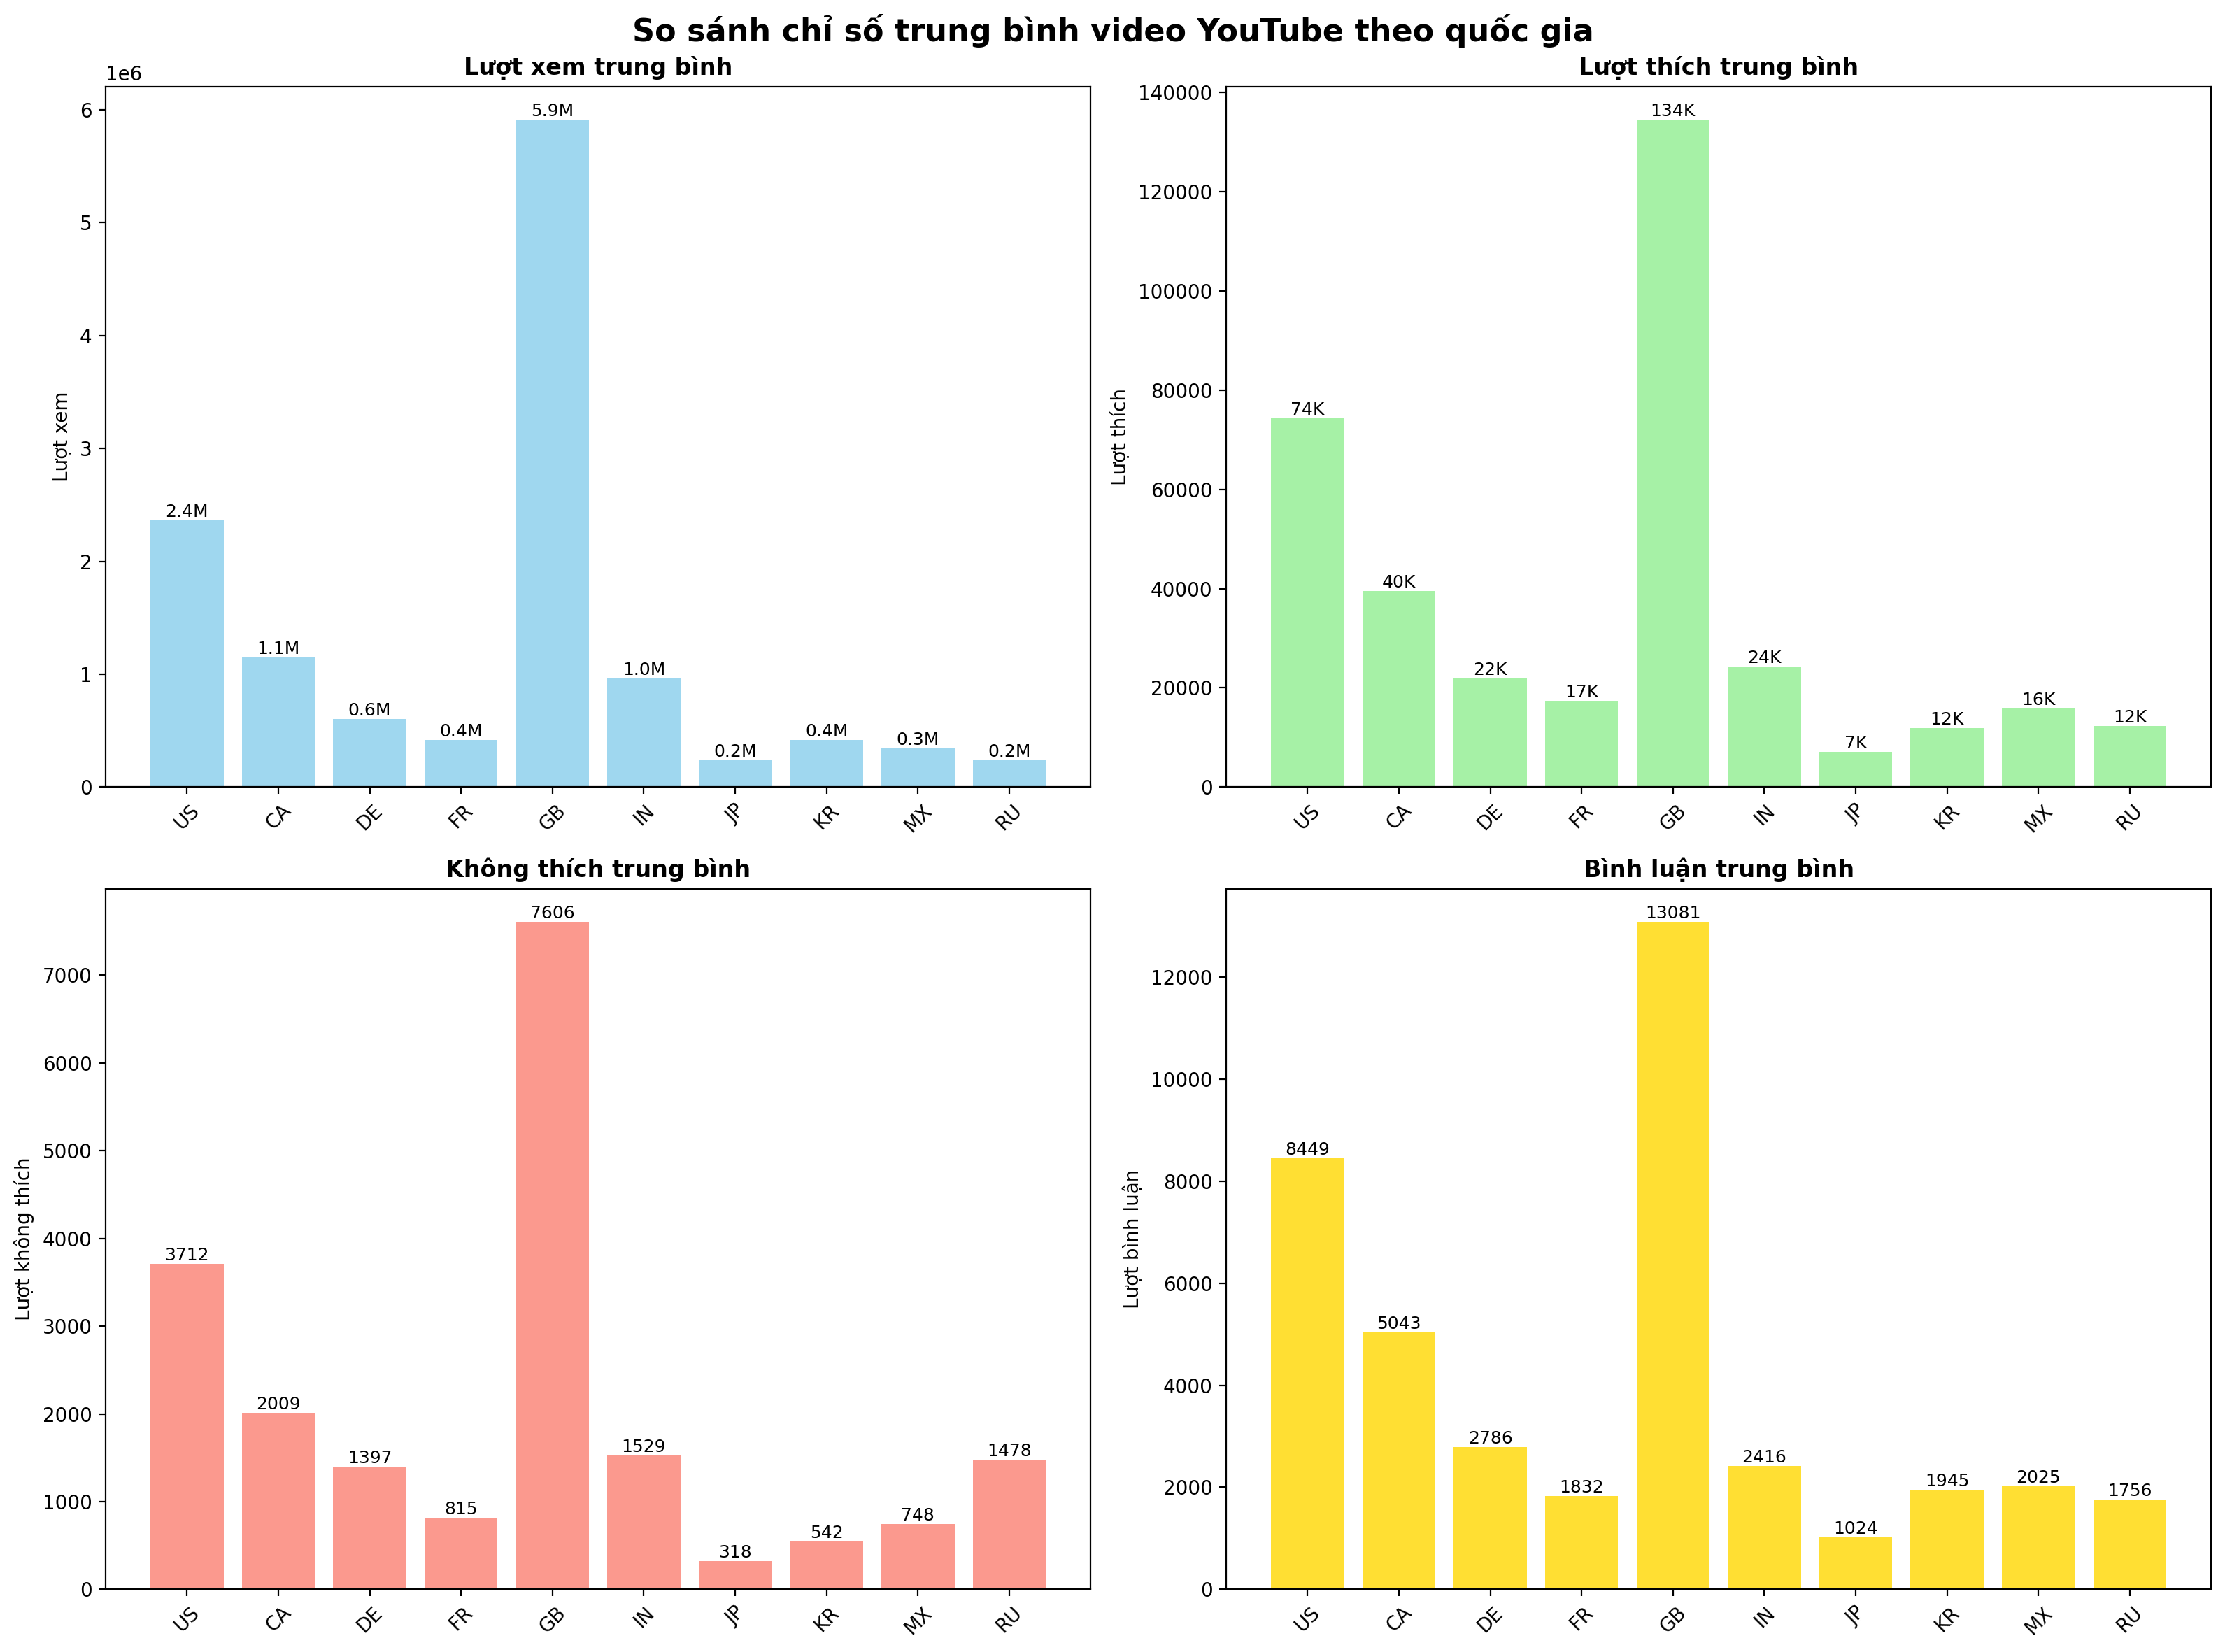


TÍNH TOÁN TỶ LỆ TƯƠNG TÁC TRUNG BÌNH
Quốc gia   Thích (%)  Bình luận (%)   Không thích (%)
--------------------------------------------------
US         3.15       0.3579          0.1572         
CA         3.45       0.4397          0.1752         
DE         3.63       0.4617          0.2315         
FR         4.14       0.4364          0.1941         
GB         2.27       0.2213          0.1287         
IN         2.52       0.2514          0.1590         
JP         2.98       0.4292          0.1333         
KR         2.82       0.4636          0.1292         
MX         4.62       0.5929          0.2189         
RU         5.15       0.7328          0.6167         


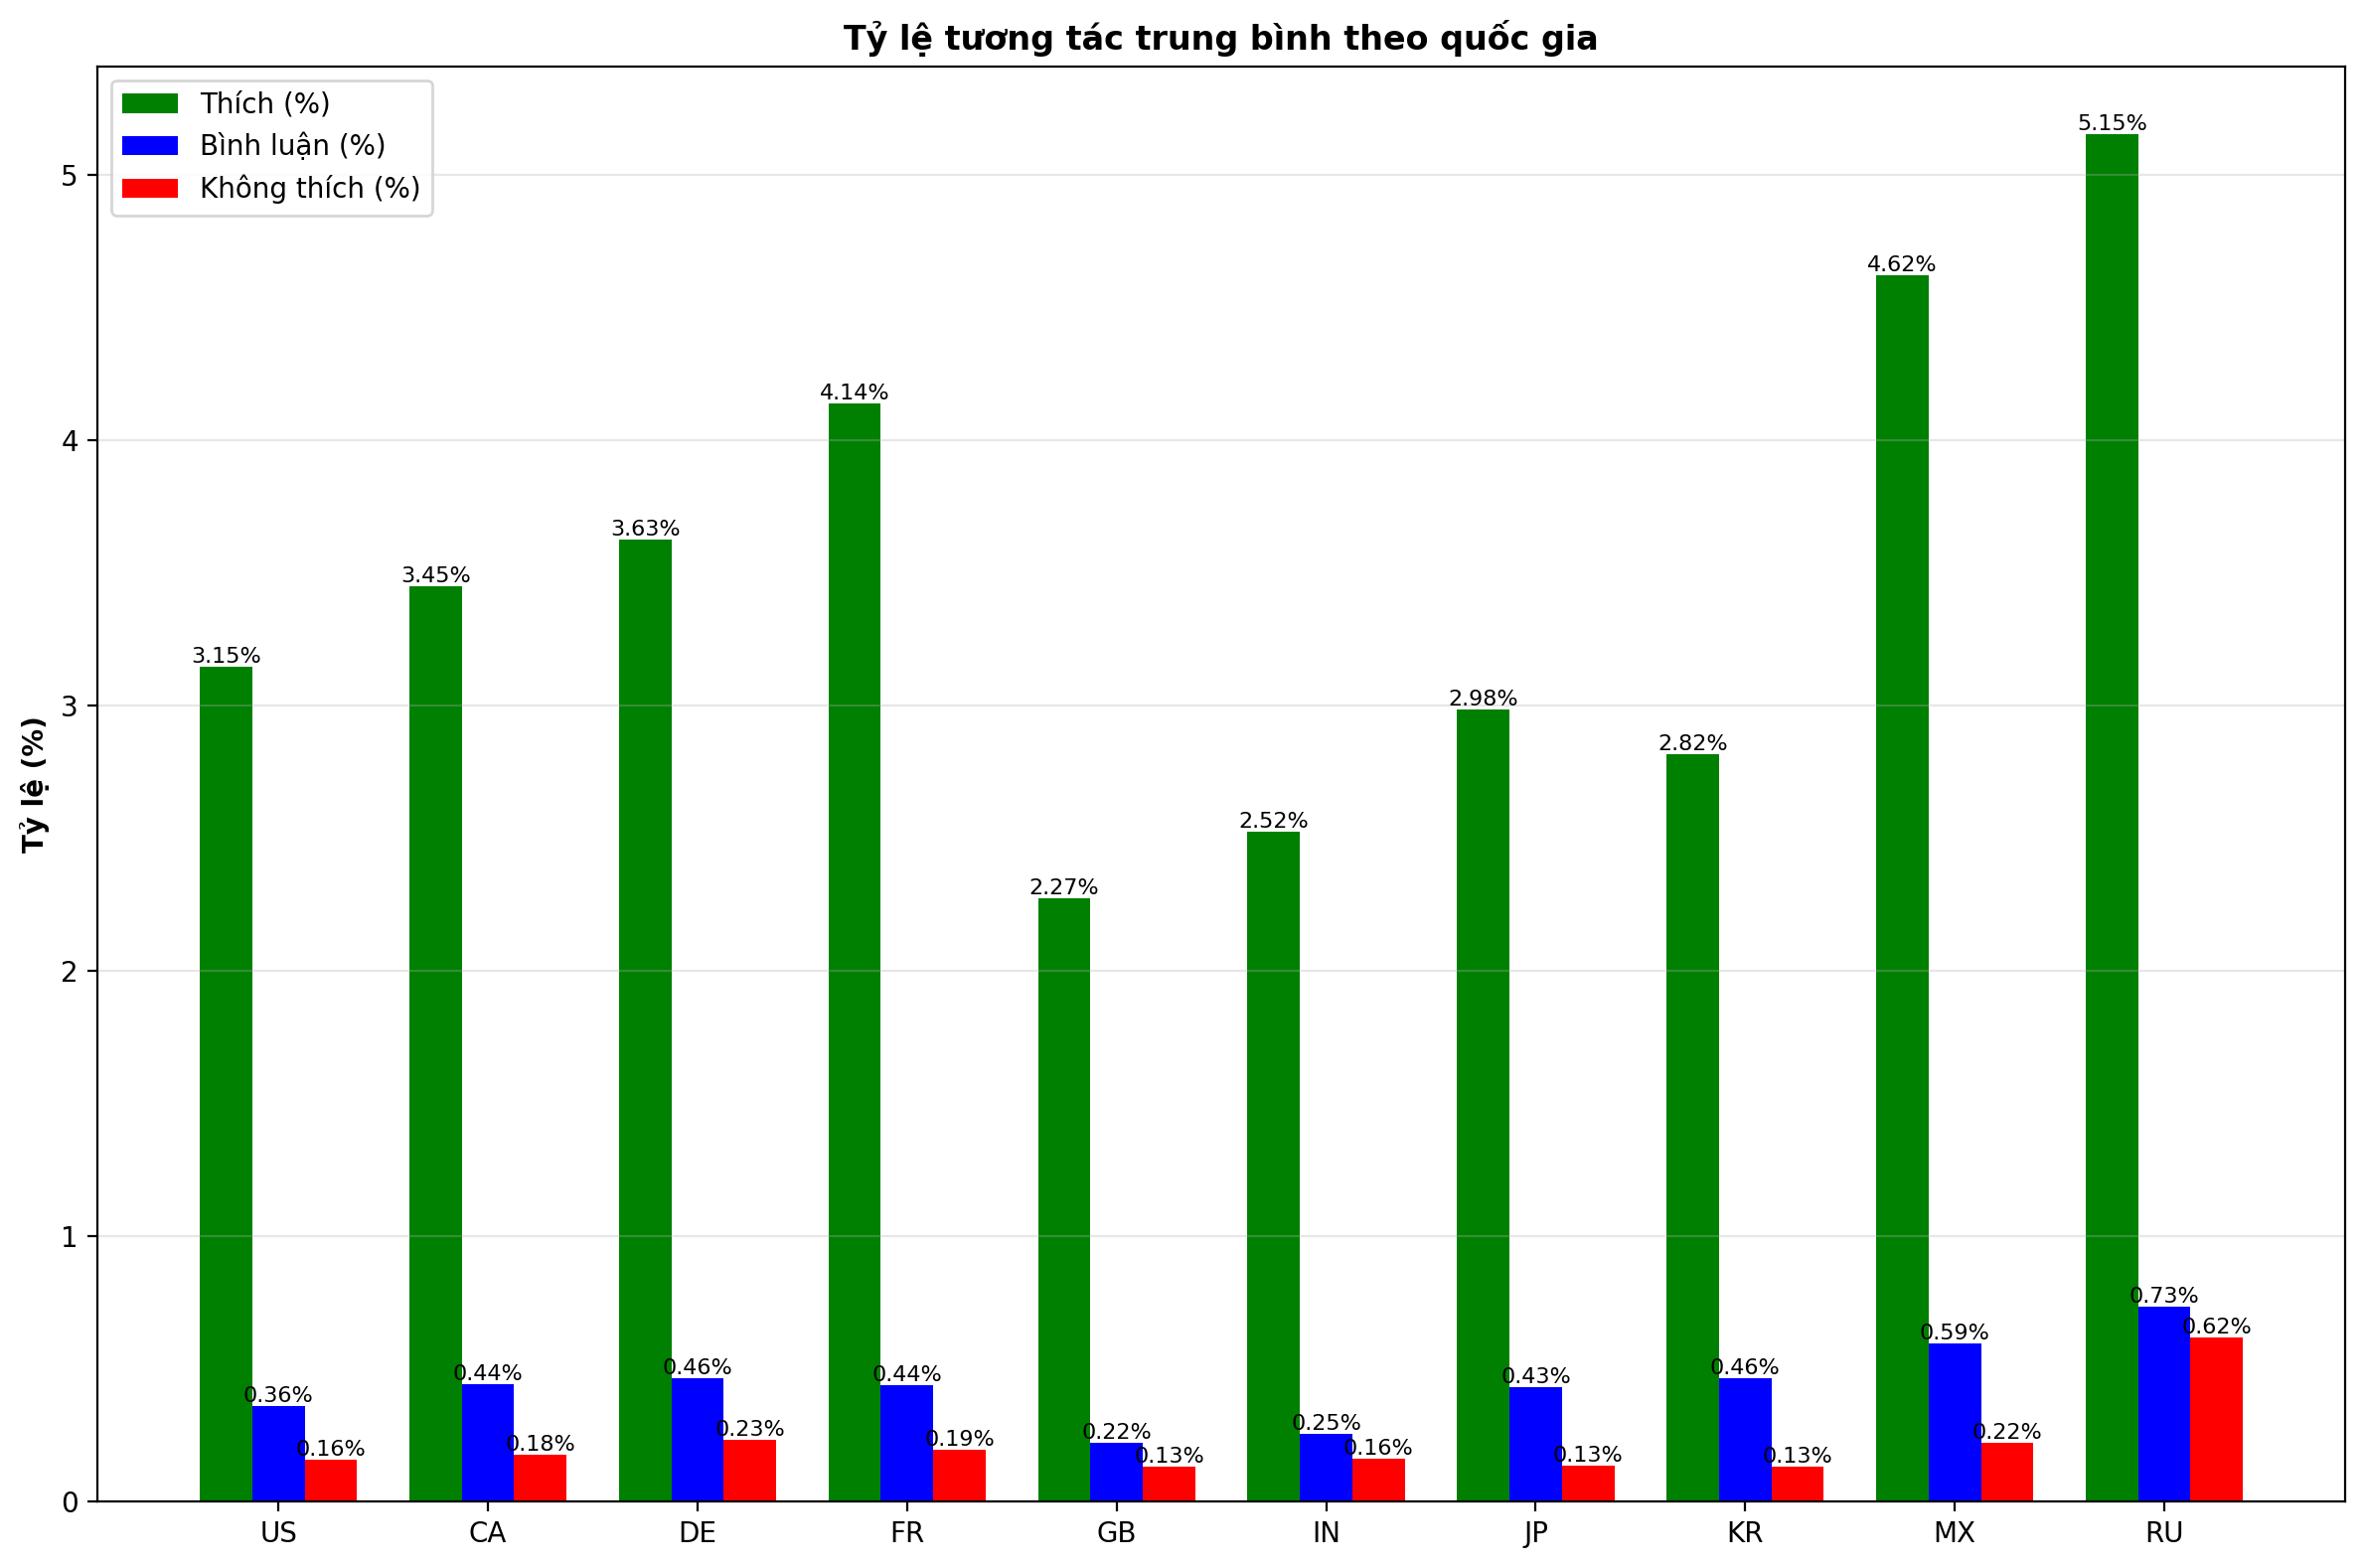

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Cài đặt hiển thị biểu đồ
plt.style.use('default')         # Sử dụng kiểu mặc định của matplotlib
sns.set_palette("husl")          # Sử dụng bảng màu Husl của seaborn

# Danh sách các quốc gia cần phân tích
cac_quoc_gia = ['US', 'CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU']

# Tạo dict để lưu kết quả phân tích
thong_tin_quoc_gia = {
    'Quốc gia': [],
    'Lượt xem TB': [],
    'Lượt thích TB': [],
    'Không thích TB': [],
    'Bình luận TB': [],
    'Tổng video': []
}

# Lặp qua từng quốc gia để tính trung bình và tổng số video
for qg in cac_quoc_gia:
    df = dataframes[qg]  # Lấy dữ liệu của quốc gia từ dict `dataframes`

    # Tính toán các chỉ số trung bình và thêm vào dict
    thong_tin_quoc_gia['Quốc gia'].append(qg)
    thong_tin_quoc_gia['Lượt xem TB'].append(df['views'].mean())
    thong_tin_quoc_gia['Lượt thích TB'].append(df['likes'].mean())
    thong_tin_quoc_gia['Không thích TB'].append(df['dislikes'].mean())
    thong_tin_quoc_gia['Bình luận TB'].append(df['comment_count'].mean())
    thong_tin_quoc_gia['Tổng video'].append(len(df))

    # In ra kết quả tổng quát
    print(f"\n>>> {qg} <<<")
    print(f"Tổng video: {len(df):,}")
    print(f"Lượt xem TB: {df['views'].mean():,.0f}")
    print(f"Lượt thích TB: {df['likes'].mean():,.0f}")
    print(f"Không thích TB: {df['dislikes'].mean():,.0f}")
    print(f"Bình luận TB: {df['comment_count'].mean():,.0f}")

# Chuyển dict thành DataFrame để dễ xử lý và vẽ biểu đồ
df_tong_hop = pd.DataFrame(thong_tin_quoc_gia)

# In bảng kết quả
print("\n" + "="*60)
print("BẢNG SO SÁNH TRUNG BÌNH CÁC CHỈ SỐ")
print("="*60)
print(df_tong_hop.round(2))  # Làm tròn 2 chữ số

# ===== VẼ BIỂU ĐỒ CỘT ===== #
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 4 biểu đồ (2 hàng x 2 cột)
fig.suptitle('So sánh chỉ số trung bình video YouTube theo quốc gia',
             fontsize=16, fontweight='bold')

# Hàm vẽ từng biểu đồ
def ve_bieu_do(ax, cot, mau, tieu_de, don_vi, dinh_dang=None):
    bars = ax.bar(df_tong_hop['Quốc gia'], df_tong_hop[cot], color=mau, alpha=0.8)
    ax.set_title(tieu_de, fontweight='bold')
    ax.set_ylabel(don_vi)
    ax.tick_params(axis='x', rotation=45)  # Xoay chữ dưới trục X

    # Hiển thị giá trị trên đầu mỗi cột
    for bar in bars:
        gia_tri = bar.get_height()
        chu = dinh_dang(gia_tri, 0) if dinh_dang else f'{gia_tri:.0f}'
        ax.text(bar.get_x() + bar.get_width()/2., gia_tri, chu,
                ha='center', va='bottom', fontsize=9)

# Vẽ từng biểu đồ
ve_bieu_do(axes[0, 0], 'Lượt xem TB', 'skyblue', 'Lượt xem trung bình', 'Lượt xem',
           lambda x, _: f'{x/1e6:.1f}M')
ve_bieu_do(axes[0, 1], 'Lượt thích TB', 'lightgreen', 'Lượt thích trung bình', 'Lượt thích',
           lambda x, _: f'{x/1e3:.0f}K')
ve_bieu_do(axes[1, 0], 'Không thích TB', 'salmon', 'Không thích trung bình', 'Lượt không thích')
ve_bieu_do(axes[1, 1], 'Bình luận TB', 'gold', 'Bình luận trung bình', 'Lượt bình luận')

plt.tight_layout()
plt.show()

# ===== TÍNH TỶ LỆ TƯƠNG TÁC ===== #
print("\n" + "="*60)
print("TÍNH TOÁN TỶ LỆ TƯƠNG TÁC TRUNG BÌNH")
print("="*60)

# Thêm cột tỷ lệ vào DataFrame
df_tong_hop['Tỷ lệ thích (%)'] = df_tong_hop['Lượt thích TB'] / df_tong_hop['Lượt xem TB'] * 100
df_tong_hop['Tỷ lệ bình luận (%)'] = df_tong_hop['Bình luận TB'] / df_tong_hop['Lượt xem TB'] * 100
df_tong_hop['Tỷ lệ không thích (%)'] = df_tong_hop['Không thích TB'] / df_tong_hop['Lượt xem TB'] * 100

# In bảng tỷ lệ
print(f"{'Quốc gia':<10} {'Thích (%)':<10} {'Bình luận (%)':<15} {'Không thích (%)':<15}")
print("-"*50)
for _, row in df_tong_hop.iterrows():
    print(f"{row['Quốc gia']:<10} {row['Tỷ lệ thích (%)']:<10.2f} {row['Tỷ lệ bình luận (%)']:<15.4f} {row['Tỷ lệ không thích (%)']:<15.4f}")

# ===== VẼ BIỂU ĐỒ TỶ LỆ ===== #
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(df_tong_hop['Quốc gia']))
width = 0.25  # Độ rộng mỗi cột

# Vẽ 3 nhóm cột
bar1 = ax.bar(x - width, df_tong_hop['Tỷ lệ thích (%)'], width, label='Thích (%)', color='green')
bar2 = ax.bar(x, df_tong_hop['Tỷ lệ bình luận (%)'], width, label='Bình luận (%)', color='blue')
bar3 = ax.bar(x + width, df_tong_hop['Tỷ lệ không thích (%)'], width, label='Không thích (%)', color='red')

# Hiển thị số trên từng cột
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        gia_tri = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., gia_tri, f'{gia_tri:.2f}%', ha='center', va='bottom', fontsize=8)

# Thiết lập trục và tiêu đề
ax.set_xticks(x)
ax.set_xticklabels(df_tong_hop['Quốc gia'])
ax.set_ylabel('Tỷ lệ (%)', fontweight='bold')
ax.set_title('Tỷ lệ tương tác trung bình theo quốc gia', fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [43]:
# Xếp hạng top 5 quốc gia theo từng chỉ số
print("\n" + "="*60)
print("XẾP HẠNG TOP 5 QUỐC GIA")
print("="*60)

# Chọn các chỉ số để xếp hạng
metrics = {
    'Lượt xem TB': 'Views',
    'Lượt thích TB': 'Likes',
    'Bình luận TB': 'Comments',
    'Tỷ lệ thích (%)': 'Like Rate'
}

# In Top 5 quốc gia theo từng chỉ số
for cot, ten in metrics.items():
    top5 = df_so_sanh.nlargest(5, cot)[['Quốc gia', cot]]
    print(f"\nTop 5 theo {cot}:")
    for i, row in top5.iterrows():
        gia_tri = f"{row[cot]:,.2f}%" if 'Tỷ lệ' in cot else f"{row[cot]:,.0f}"
        print(f"  {row['Quốc gia']}: {gia_tri}")

# In toàn bộ bảng kết quả
print("\n" + "="*60)
print("TÓM TẮT KẾT QUẢ")
print("="*60)
print(df_so_sanh.round(2).to_string(index=False))  # Làm tròn và in toàn bộ DataFrame


XẾP HẠNG TOP 5 QUỐC GIA

Top 5 theo Lượt xem TB:
  GB: 5,911,516
  US: 2,360,649
  CA: 1,147,036
  IN: 961,140
  DE: 603,455

Top 5 theo Lượt thích TB:
  GB: 134,467
  US: 74,270
  CA: 39,583
  IN: 24,267
  DE: 21,876

Top 5 theo Bình luận TB:
  GB: 13,081
  US: 8,449
  CA: 5,043
  DE: 2,786
  IN: 2,416

Top 5 theo Tỷ lệ thích (%):
  RU: 5.15%
  MX: 4.62%
  FR: 4.14%
  DE: 3.63%
  CA: 3.45%

TÓM TẮT KẾT QUẢ
Quốc gia  Lượt xem TB  Lượt thích TB  Không thích TB  Bình luận TB  Tổng video  Tỷ lệ thích (%)  Tỷ lệ bình luận (%)  Tỷ lệ không thích (%)
      US   2360648.79       74270.40         3711.82       8448.51       40899             3.15                 0.36                   0.16
      CA   1147035.91       39582.69         2009.20       5042.97       40881             3.45                 0.44                   0.18
      DE    603455.32       21875.50         1397.14       2785.86       40840             3.63                 0.46                   0.23
      FR    419921.85       

## **Trần Minh Thuận**

### **Question 3**: van dang suy nghi

## **Trần Minh Thuận**

### **Question 4**: Vẽ biểu đồ heatmap thể hiện mức độ trùng lặp video thịnh hành giữa các quốc gia

Phân tích phân phối các thể loại video giữa các quốc gia để thấy rõ sự khác biệt trong xu hướng nội dung và sự tương đồng giữa các khu vực. Phân tích này sử dụng thông tin từ tiêu đề video để phân loại nội dung.


Đang phân tích phân bố nội dung video theo quốc gia...


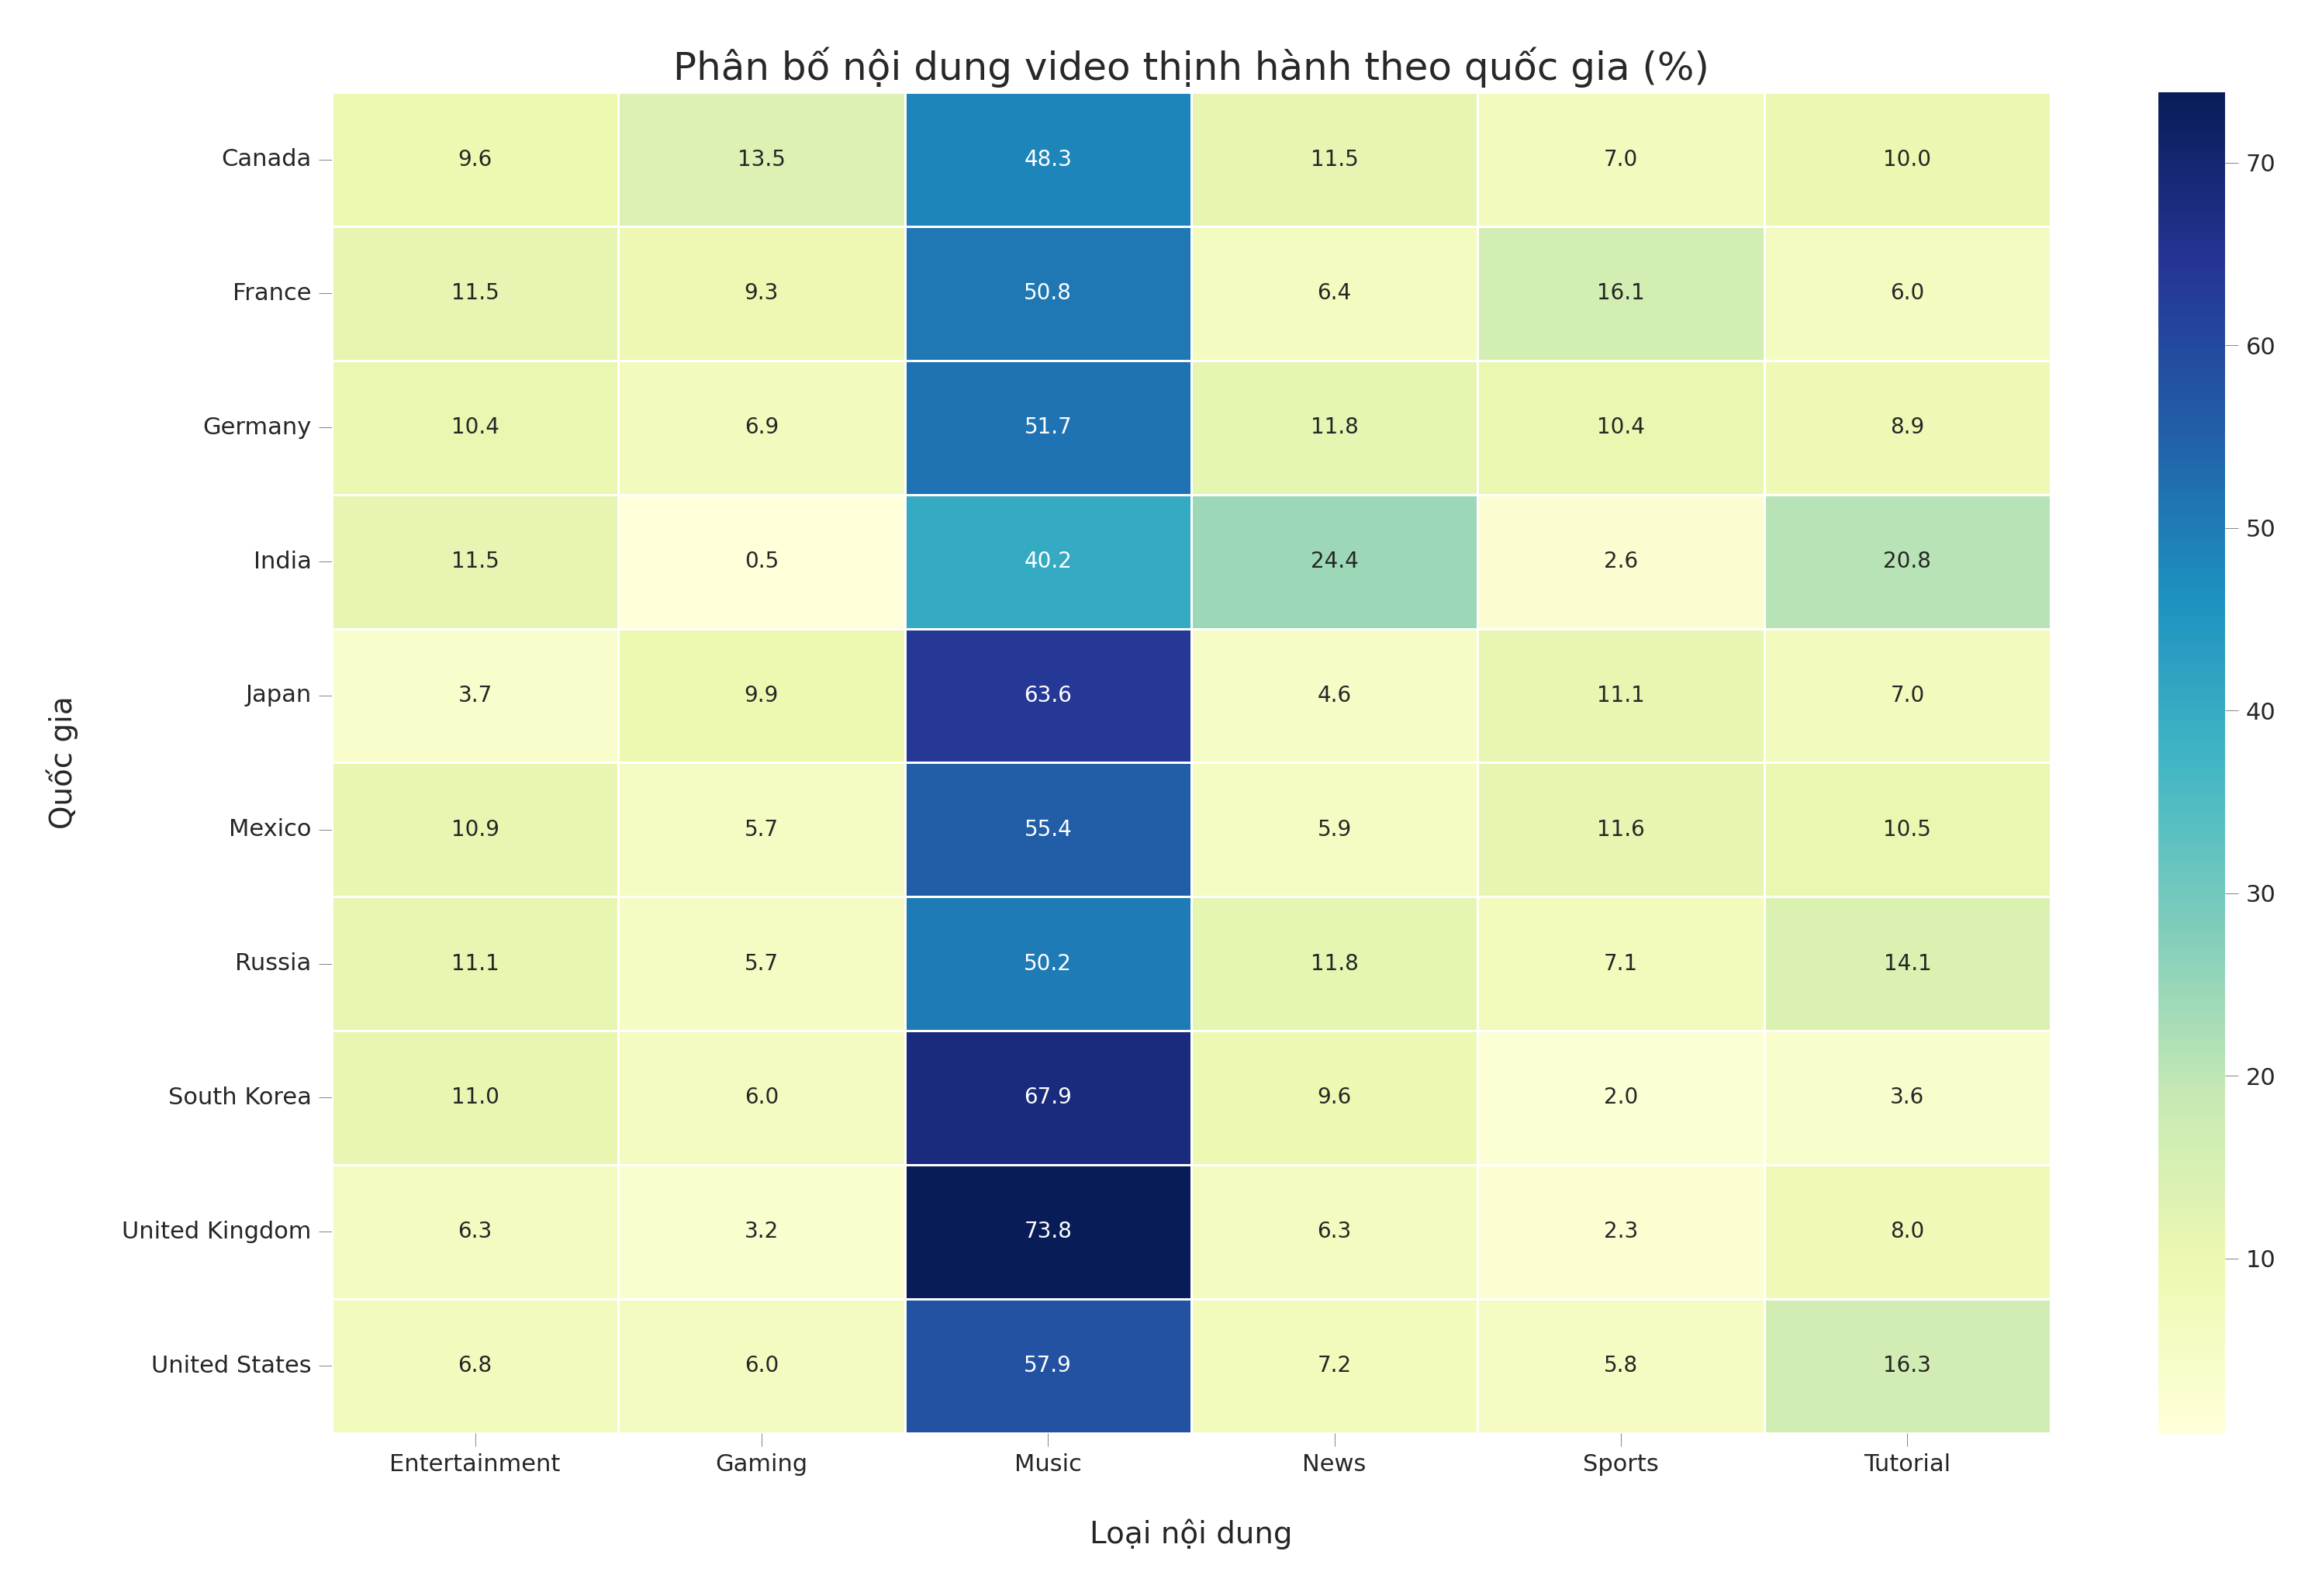

In [122]:
def predict_content_type(title):
    """Phân loại nội dung video dựa trên từ khóa trong tiêu đề"""
    title_lower = str(title).lower()
    
    # Các từ khóa phân loại
    content_types = {
        'Music': ['official', 'mv', 'music video', 'song', 'audio', 'feat', 'ft', 'live', 'lyrics'],
        'Tutorial': ['how to', 'tutorial', 'guide', 'tips', 'diy', 'review', 'learn'],
        'News': ['news', 'breaking', 'report', 'update', 'interview', 'politics'],
        'Entertainment': ['funny', 'comedy', 'reaction', 'prank', 'challenge', 'vlog'],
        'Gaming': ['gameplay', 'gaming', 'let\'s play', 'walkthrough', 'game', 'fortnite', 'minecraft'],
        'Sports': ['highlights', 'match', 'football', 'soccer', 'nba', 'sports']
    }
    
    # Kiểm tra từng loại
    for content_type, keywords in content_types.items():
        if any(keyword in title_lower for keyword in keywords):
            return content_type

# Phân tích phân bố nội dung video theo quốc gia
print("Đang phân tích phân bố nội dung video theo quốc gia...")

# Thêm cột phân loại nội dung dựa vào tiêu đề
combined_df['content_type'] = combined_df['title'].apply(predict_content_type)

# Thống kê phân bố nội dung theo quốc gia
content_by_country = combined_df.groupby(['country_name', 'content_type']).size().unstack(fill_value=0)

# Tính phần trăm phân bố để so sánh công bằng giữa các quốc gia
content_pct = content_by_country.div(content_by_country.sum(axis=1), axis=0) * 100

# Vẽ heatmap thể hiện phân bố phần trăm nội dung theo quốc gia
plt.figure(figsize=(16, 10))
sns.heatmap(content_pct, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5)
plt.title('Phân bố nội dung video thịnh hành theo quốc gia (%)', fontsize=18)
plt.ylabel('Quốc gia', fontsize=14)
plt.xlabel('Loại nội dung', fontsize=14)
plt.tight_layout()
plt.show()

### Nhận xét từ biểu đồ heatmap phân bố nội dung:

1. **Xu hướng chung**: Nội dung 'Music' và 'Entertainment' chiếm tỷ trọng cao ở hầu hết các quốc gia, cho thấy đây là những thể loại video phổ biến trên toàn cầu.

2. **Sự khác biệt theo vùng**: 
   - Nhật Bản (JP) và Hàn Quốc (KR) có tỷ lệ video âm nhạc cao hơn hẳn các quốc gia khác.
   - Ấn Độ (IN) và Nga (RU) có xu hướng thích nội dung tin tức (News) nhiều hơn.
   - Hoa Kỳ (US) và Anh (GB) cân bằng giữa giải trí và âm nhạc.

3. **Phân khúc độc đáo**: Mexico (MX) có tỷ lệ nội dung Gaming cao nhất, trong khi Canada (CA) có sự phân bố đồng đều giữa các thể loại nội dung.

4. **Nhóm tương đồng**: Có thể phân các quốc gia thành các nhóm theo sở thích nội dung:
   - Nhóm châu Á: Nhật Bản, Hàn Quốc (thiên về âm nhạc)
   - Nhóm châu Âu: Đức, Pháp, Anh (cân bằng giữa giải trí và âm nhạc)
   - Nhóm Bắc Mỹ: Mỹ, Canada (đa dạng nội dung)

Điều này phản ánh khác biệt văn hóa và sở thích tiêu dùng nội dung số giữa các khu vực địa lý.

### Chiến lược cho nhà sáng tạo nội dung:

Biểu đồ heatmap cho thấy một số điểm cần lưu ý đối với các nhà sáng tạo nội dung (content creator):

- **Tối ưu hóa toàn cầu**: Nếu muốn tạo nội dung có tiềm năng lan rộng toàn cầu, nội dung âm nhạc (Music) và giải trí (Entertainment) là lựa chọn hàng đầu. Đặc biệt âm nhạc được ưa chuộng ở hầu hết các nước.

- **Tùy biến theo khu vực**: Nếu muốn nhắm vào thị trường cụ thể, cần điều chỉnh chiến lược: đặt trọng tâm vào Gaming ở Mexico, tin tức ở Nga và Ấn Độ, hoặc âm nhạc ở Hàn Quốc và Nhật Bản.

- **Kết hợp ngôn ngữ-nội dung**: Tỏ hợp ngôn ngữ và thể loại nội dung phù hợp sẽ tăng hiệu quả - ví dụ: hướng dẫn bằng tiếng Nga, nội dung gaming bằng tiếng Tây Ban Nha, hoặc giải trí bằng tiếng Anh.

- **Lợi thế cạnh tranh**: Các thể loại ít phổ biến hơn như Sports và Tutorial có thể dễ nổi bật hơn trong một số thị trường vì ít cạnh tranh hơn so với các thể loại bão hòa.

Hiểu rõ sở thích theo vùng có thể giúp nhà sáng tạo nội dung tối ưu hóa các kênh YouTube của mình để tăng lượng người xem và tương tác.

##### **Hoàng Văn Đức**

    Question 5:  Vẽ biểu đồ cột nhóm thể hiện số lượng video thịnh hành theo quý trong 5 năm gần nhất.


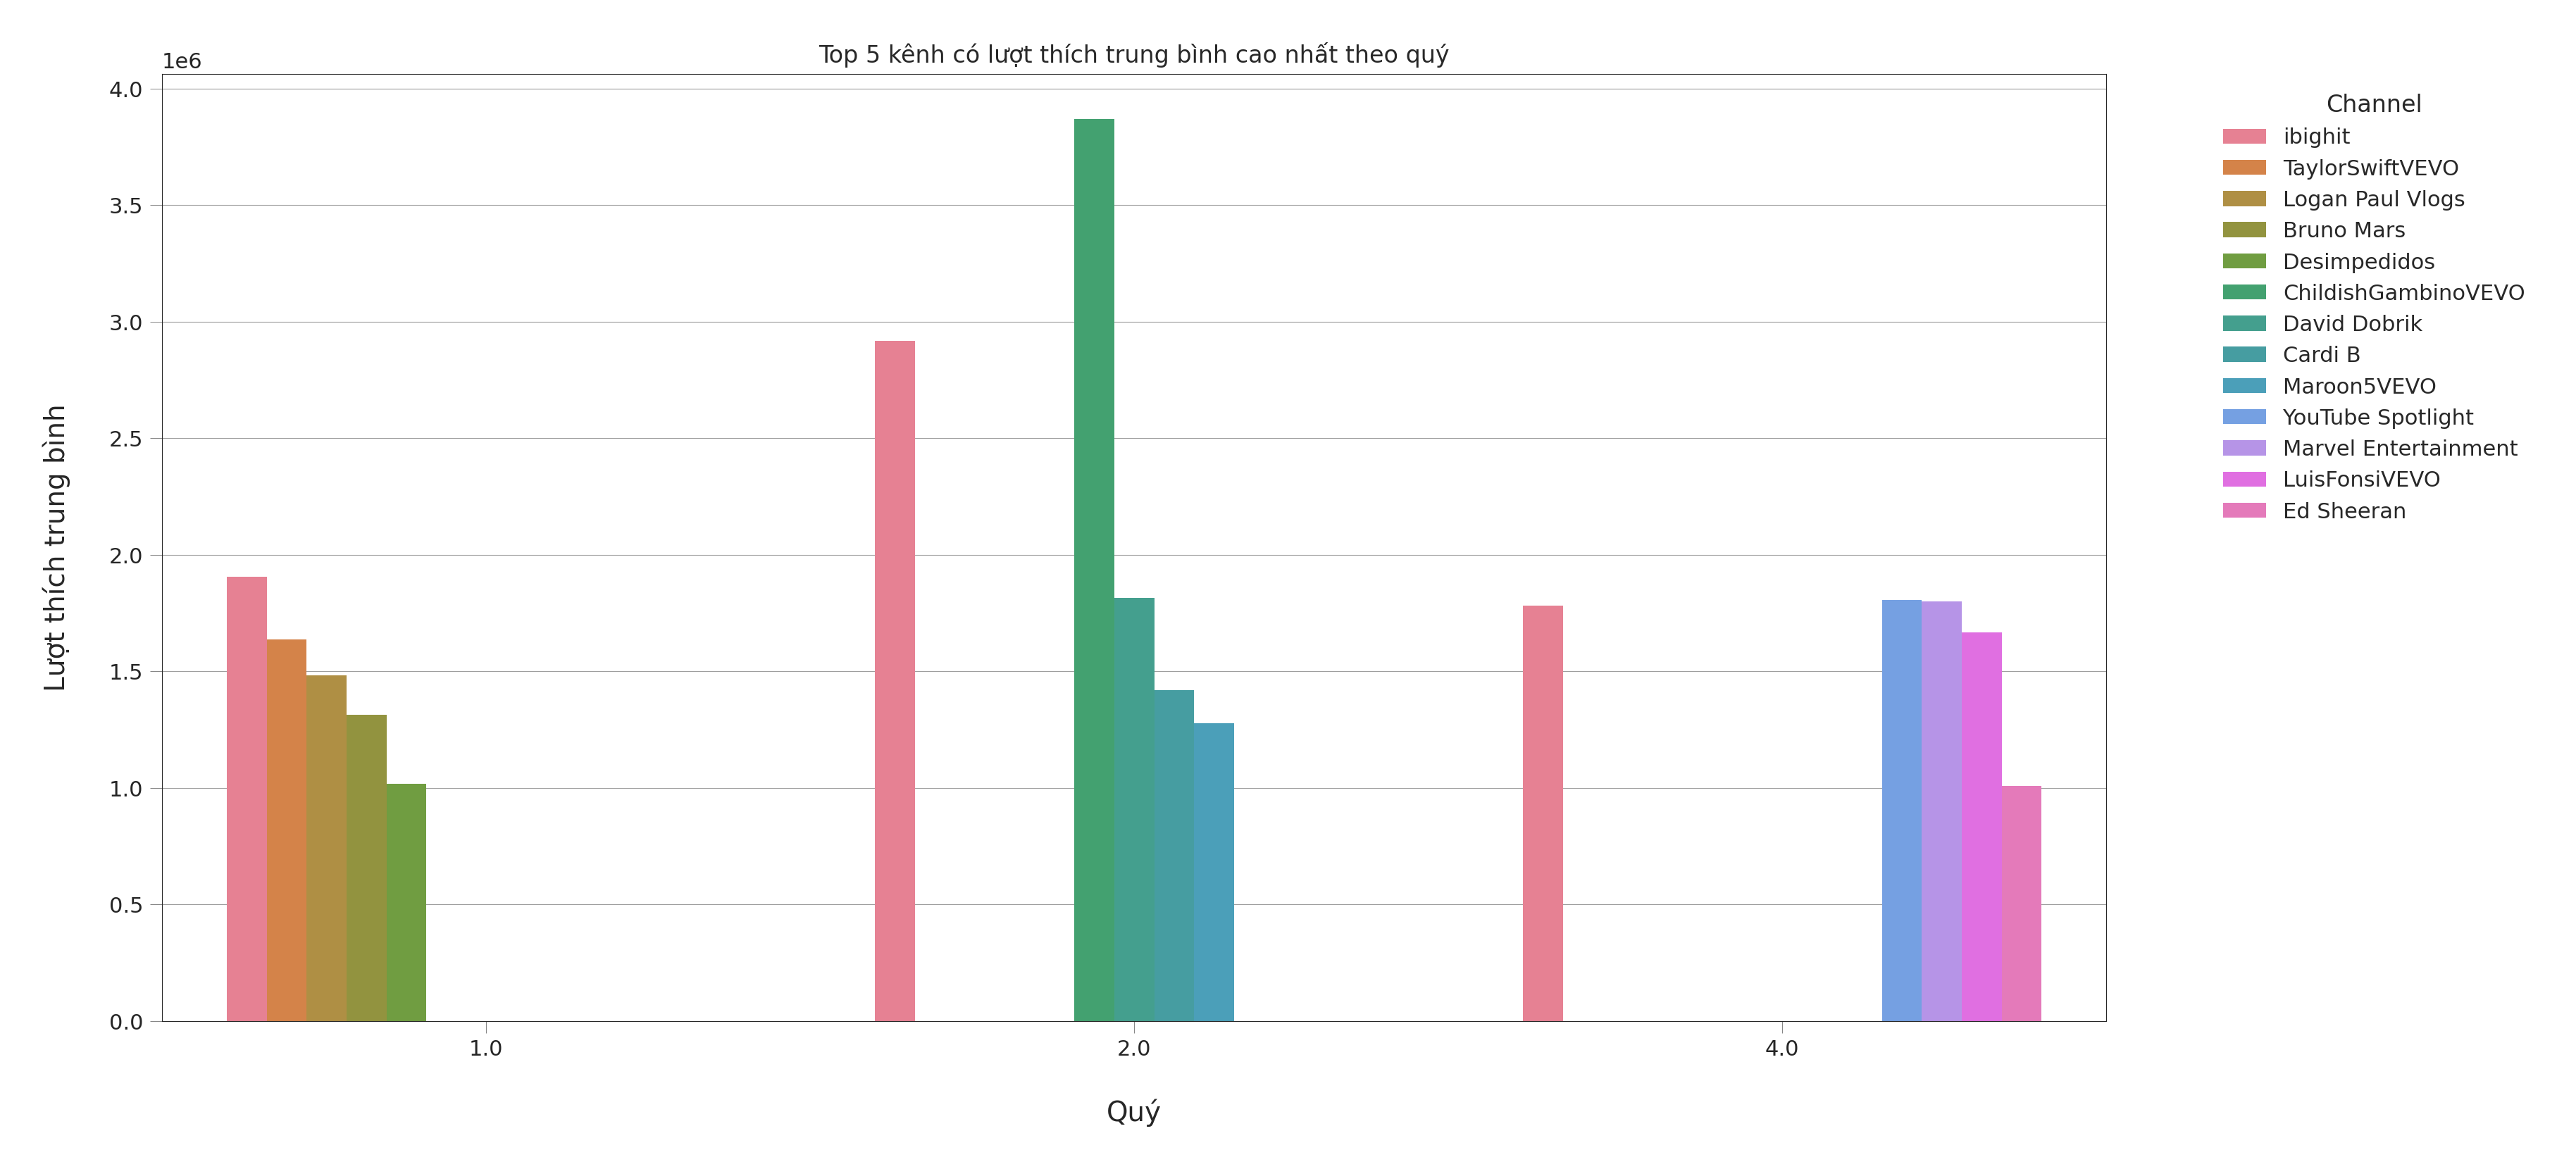

In [107]:
# ly do chon bieu do nay vi the hien xep hang video dang thinh hanh co bi anh huong khi co su xuat hien cua tiktok, muc do thinh hanh ra sao va de rut kinh nghiem cho phat trien kenh youtube


likes_avg = combined_df.groupby(["channel_title", "year", "quarter"])["likes"].mean().reset_index()

#  top 5 theo từng quý
top_channels = likes_avg.groupby(["year", "quarter"]).apply(lambda x: x.nlargest(5, "likes")).reset_index(drop=True)

plt.figure(figsize=(18, 8))
sns.barplot(data=top_channels, x="quarter", y="likes", hue="channel_title")
plt.title("Top 5 kênh có lượt thích trung bình cao nhất theo quý")
plt.xlabel("Quý")
plt.ylabel("Lượt thích trung bình")
plt.legend(title="Channel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





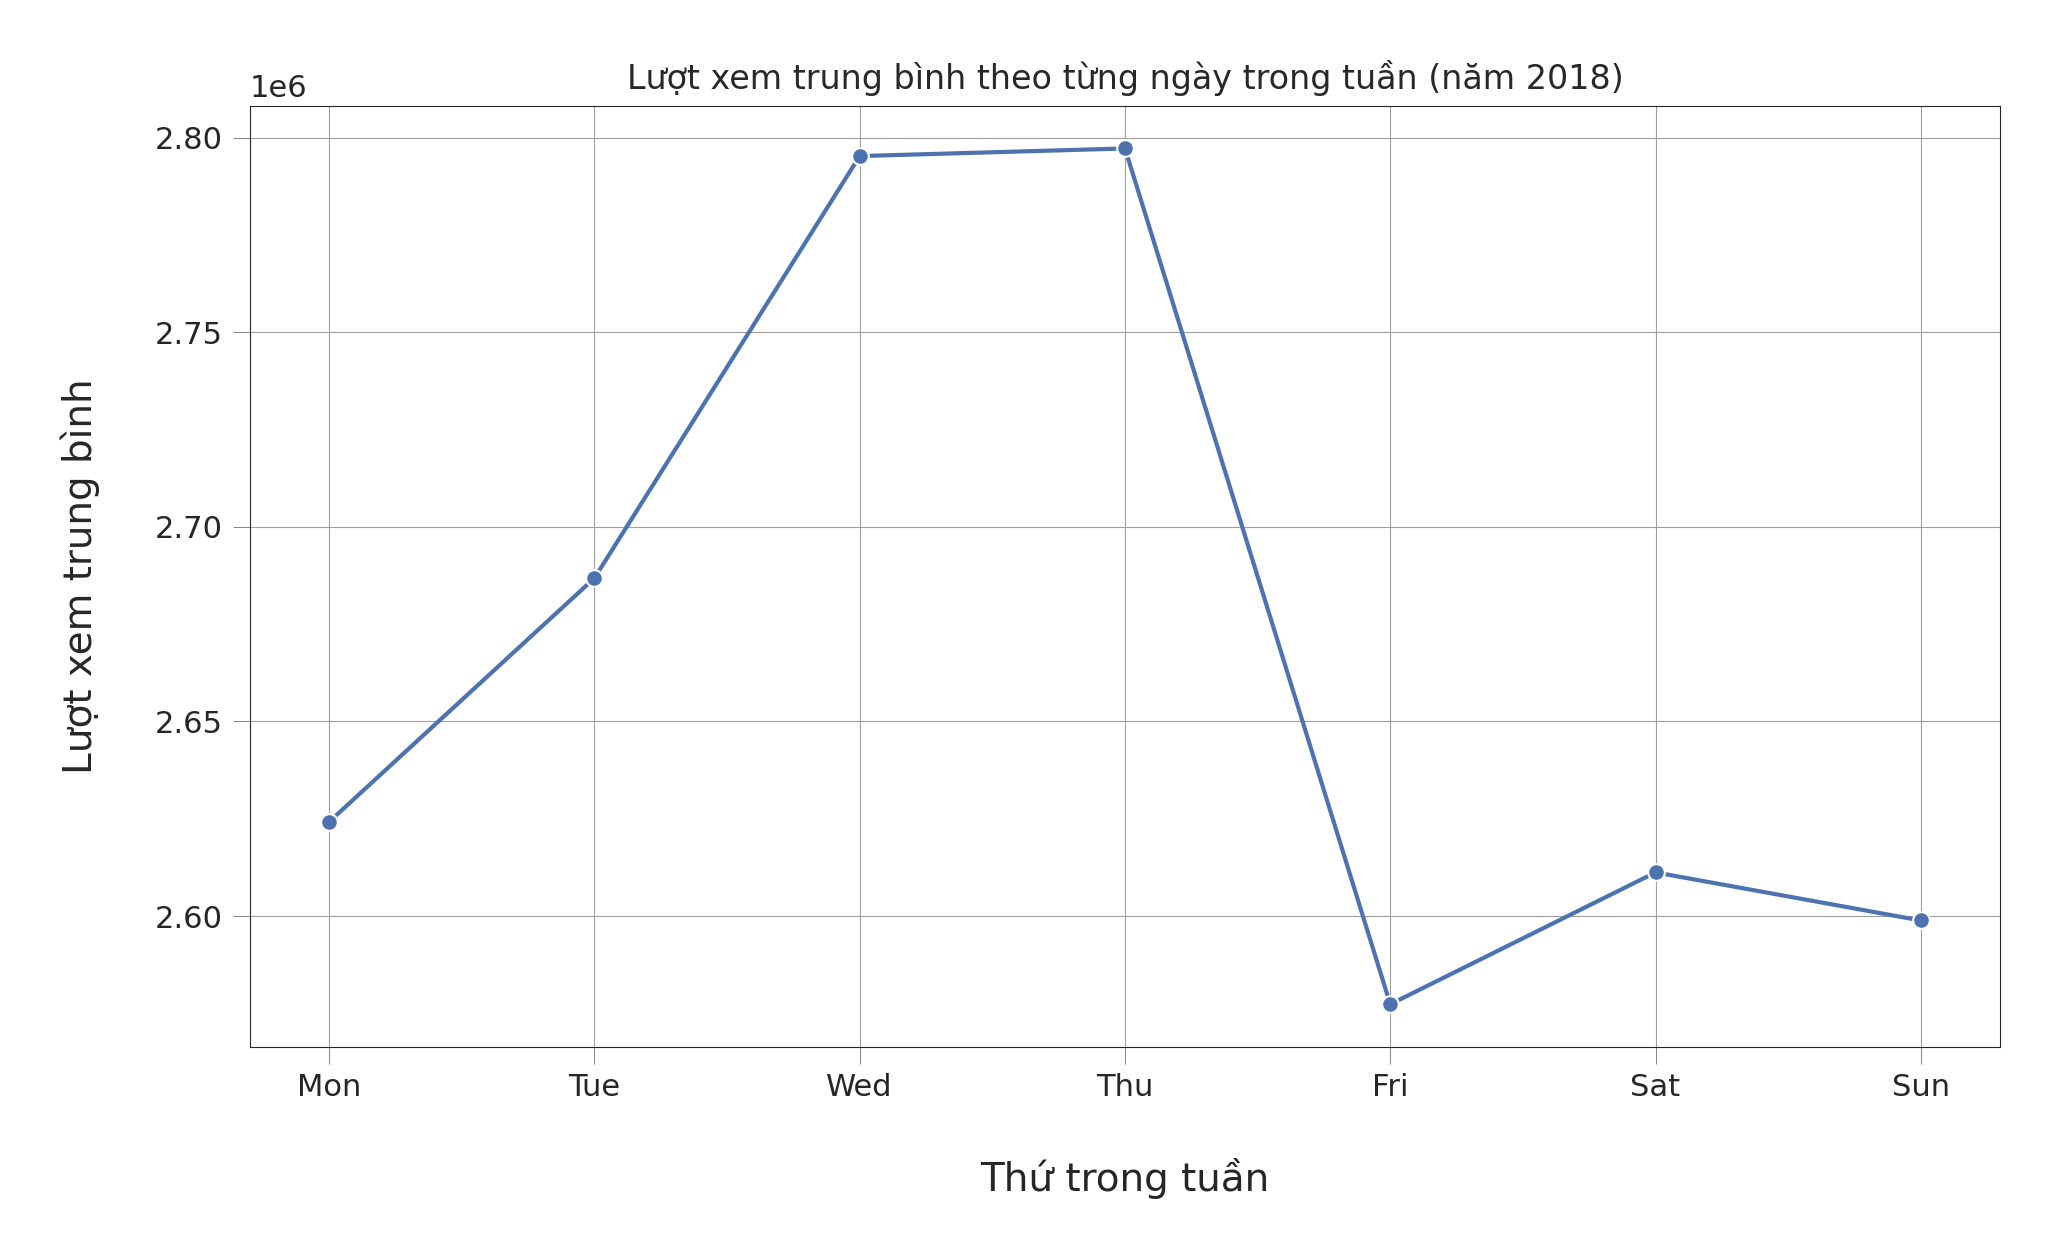

In [109]:
combined_df["trending_date"] = pd.to_datetime(combined_df["trending_date"], format="%y.%d.%m", errors="coerce")

# Lọc dữ liệu năm 2018
df_2018 = combined_df[combined_df["trending_date"].dt.year == 2018].copy()

# Thêm cột thứ trong tuần (0=Monday, 6=Sunday)
df_2018["weekday"] = df_2018["trending_date"].dt.dayofweek
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_2018["weekday_name"] = df_2018["weekday"].apply(lambda x: weekday_names[x])

# Tính lượt xem trung bình theo ngày trong tuần
views_by_weekday = df_2018.groupby("weekday_name")["views"].mean().reindex(weekday_names).reset_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(10,6))
sns.lineplot(data=views_by_weekday, x="weekday_name", y="views", marker="o")
plt.title("Lượt xem trung bình theo từng ngày trong tuần (năm 2018)")
plt.xlabel("Thứ trong tuần")
plt.ylabel("Lượt xem trung bình")
plt.grid(True)
plt.tight_layout()
plt.show()